# **Decoding the Dynamics of Hospitality Pricing: Airbnb's Quintessential Quest for Optimal Listing Valuation**



---






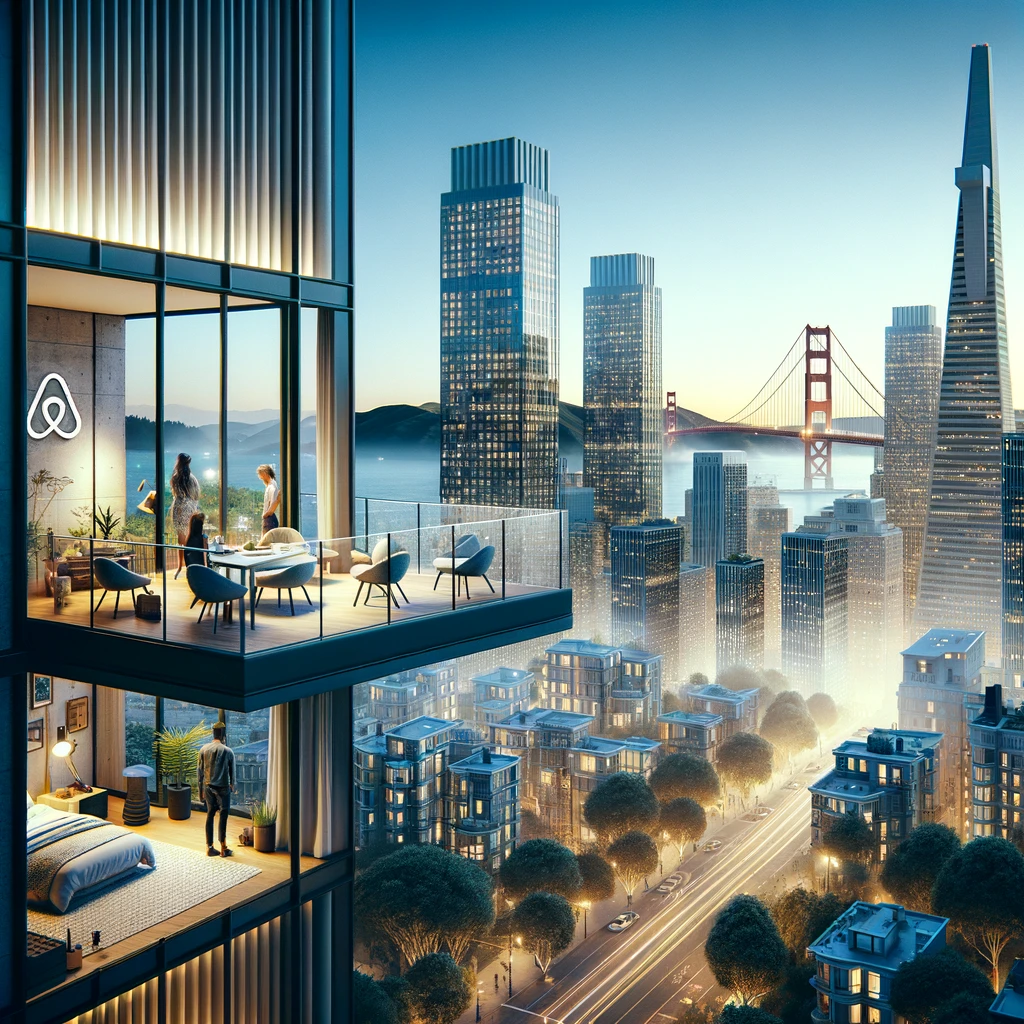

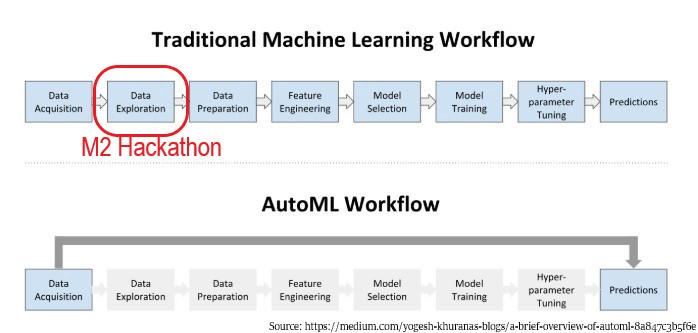

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Feature Engineering with 'Date'
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**

Develop a data science solution to predict and optimize Airbnb listing prices in San Francisco, CA. The model should aim to maximize yearly profit for hosts by determining competitive daily rates based on listing attributes and location factors.

The overarching goal of this project is to build a data science solution that allows Airbnb hosts to set optimal prices for their listings to maximize their yearly revenue.

To achieve this, we need to:

- Build a pricing model that accurately predicts the market price for a listing based on its attributes
- Incorporate dynamic pricing logic to adjust prices based on demand, seasons, events etc.
- Simulate pricing and bookings over a full year to estimate potential revenue
- Optimize the price per day to maximize total bookings and revenue for the year

The model should be optimized to generate the highest possible yearly revenue for a host by recommending competitive yet profitable daily prices.

## Impact

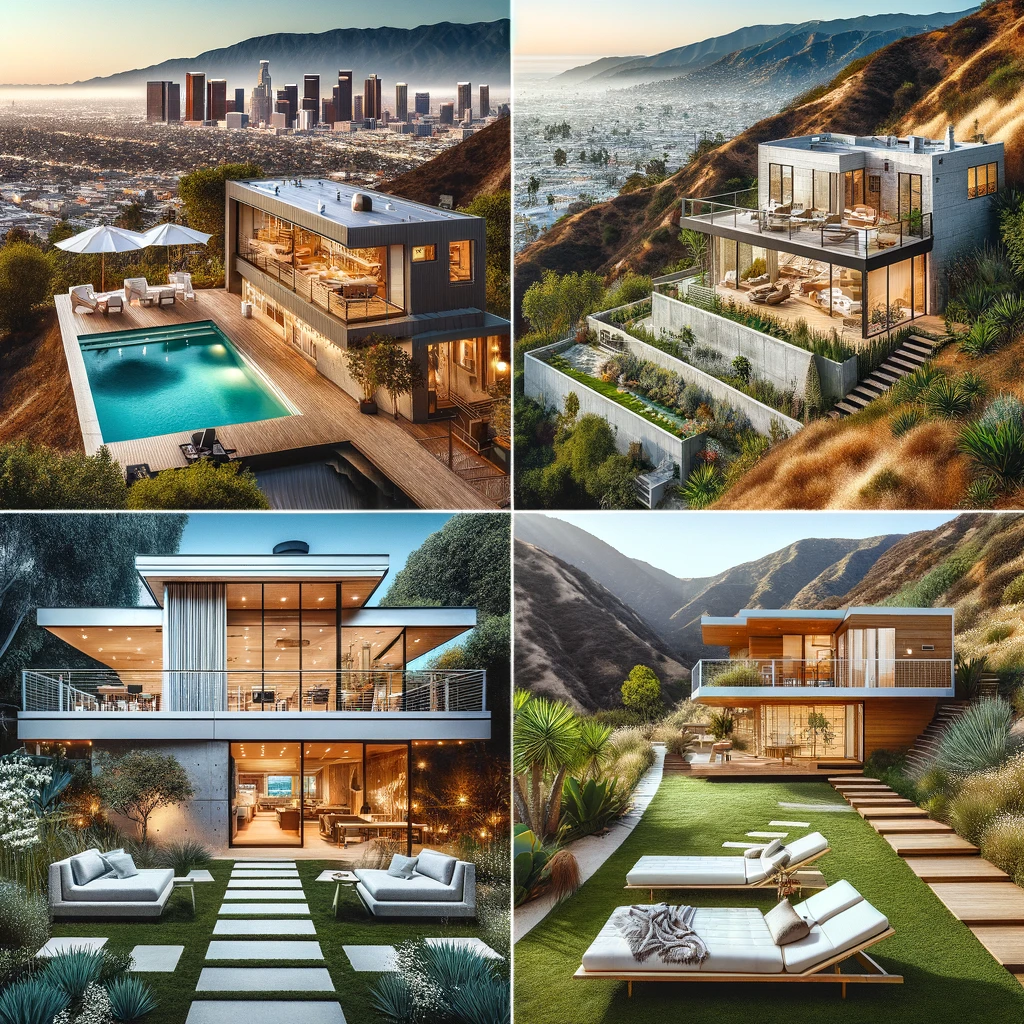

For hosts, optimized pricing can help maximize bookings and annual revenue. By setting competitive rates aligned with market demand, hosts can attract more prospective guests and minimize vacancies. The model accounts for listing attributes, area factors, and seasonal trends to determine fair prices. This allows hosts to accurately value their spaces, avoid underpricing, and reduce missed bookings.

For guests, data-driven pricing provides a consistent benchmark for assessing listing costs. Guests can instantly gauge whether a rate seems fair or inflated based on the property details, location, and date. This brings more transparency to the marketplace and empowers guests to find optimal deals.

Overall, balanced pricing and insights can make the Airbnb marketplace more efficient. More appropriate host pricing may lead to greater occupancy rates and platform activity. This creates a positive flywheel - more bookings incentivize more listings, which attracts more guests. Optimized pricing also discourages overcharging during peak times, improving perceptions of the platform.

However, the model is limited to predictions under normal conditions. Surges in demand from special events are not accounted for. The analysis focuses narrowly on SF data, though the methodology could be expanded. Still, rational pricing stands to benefit hosts, guests, and the Airbnb ecosystem as a whole.

### Resources

- https://medium.com/airbnb-engineering/prioritizing-home-attributes-based-on-guest-interest-3c49b827e51a
- https://medium.com/airbnb-engineering/wisdom-of-unstructured-data-building-airbnbs-listing-knowledge-from-big-text-data-7c533466a63c

#**BLUF**
(Bottom Line Up Front)


#**Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install --quiet --upgrade plotly   # you may need to pip install plotly
!pip install --quiet jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

<ipython-input-2-9ec51eb2c058>:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-9ec51eb2c058>:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
!pip install --quiet sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

In [ ]:
# Install low-code AutoViz and PyCaret
!pip install -q psynlig
!pip install -q pycaret autoviz --upgrade psynlig
from pycaret.classification import *
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


#**Data**

The dataset comes from __[Inside Airbnb](http://insideairbnb.com/get-the-data.html)__, an independent, third-party website that has its own set of open-source tools that encourage users to explore the negative and positive impacts of Airbnb. They scrape Airbnb listings from different metropolitan areas around the world, strip personal identification (like the full name of hosts and guests), and share the raw data on the site. The dataset used in this study is the “listings.csv” for SF, CA as of 4th December 2023. Some of the useful details include the listing price, the listing type (private bedroom, shared bedroom, or entire home), the location of the listing, review score of the listing (aggregated guest ratings), review score of the host, etc.

The data dictionary is as follows:


In [ ]:
# Read
file_ = "/content/listings_SanFan.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [ ]:
selected_features = [u'price',u'accommodates',u'host_response_time',
       u'bathrooms', u'bedrooms', u'beds',u'security_deposit', u'cleaning_fee', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',u'guests_included',
       u'availability_365',
       u'number_of_reviews', u'review_scores_rating',u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'house_rules',u'amenities','bed_type', 'room_type', 'cancellation_policy', 'property_type']
df = df.loc[:, selected_features]
df.head()

price   accommodates  host_response_time  bathrooms  bedrooms  beds  \
0  $56.00        4           within an hour     1.0        1.0     2.0   
1  $36.00        2           within an hour     1.0        1.0     1.0   
2  $80.00        6           within an hour     1.5        2.0     3.0   
3  $80.00        2       within a few hours     1.0        1.0     1.0   
4  $20.00        3           within an hour     1.0        1.0     1.0   

  security_deposit cleaning_fee  guests_included extra_people  minimum_nights  \
0          NaN        $30.00            2           $15.00            2         
1          NaN        $35.00            1           $20.00            1         
2      $150.00        $65.00            4           $15.00            1         
3          NaN        $10.00            2           $10.00            2         
4          NaN           NaN            1           $10.00            3         

   maximum_nights  guests_included  availability_365  number_of_reviews  \
0       1125              2                 32               25           
1          7              1                  0                0           
2         90              4                158                4           
3          4              2                 52               12           
4         20              1                115               96           

   review_scores_rating  review_scores_cleanliness  review_scores_checkin  \
0          99.0                    10.0                     10.0            
1           NaN                     NaN                      NaN            
2          95.0                    10.0                     10.0            
3          98.0                    10.0                     10.0            
4          94.0                     9.0                     10.0            

   review_scores_communication  review_scores_location  review_scores_value  \
0             10.0                       10.0                  10.0           
1              NaN                        NaN                   NaN           
2             10.0                       10.0                  10.0           
3             10.0                       10.0                  10.0           
4             10.0                       10.0                   9.0           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            house_rules                                                                                                                                                                                                                                                                                                                                                                                                                                                                             \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

#**Engineering**


##**Feature Engineering with Date**

In [ ]:
# FEES and PRICES
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)
df['availability'] = df['availability_365'] / 365

In [ ]:
# HOUSE RULES
house_rules = df['house_rules'].str.lower()

smoking = house_rules.str.contains("smoke|smoking", na= False)
df.loc[:, 'smoking'] = - smoking # False: No smoking allowed

pet = house_rules.str.contains("pet", na=False)
df.loc[:, 'pet'] = - pet

party = house_rules.str.contains("party|parties", na=False)
df.loc[:, 'party'] = - party

guest = house_rules.str.contains("guest|guests", na=False)
df.loc[:, 'guest'] = - guest

df = df.drop(['house_rules'], axis = 1)

In [ ]:
import re
import numpy as np
# AMENITIES
amenities = list(df['amenities'])
total = ','.join(amenities)
total = total.replace("{", "").replace("}","").replace("\"", "").split(",")
amenity_items = list(set(total))
amenity_items = list(filter(None, amenity_items))
for item in amenity_items:
    if re.match(r'translation',item):
        amenity_items.remove(item)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Get the list of amenities
amenities = list(df['amenities'])

# Create a DataFrame with the amenities as columns and filled with 0
new_table = pd.DataFrame(index=df.reset_index().values[:, 0], columns=amenity_items).fillna(0)

# Iterate over each amenity and mark 1 if present
for i in range(len(amenities)):
    for item in amenity_items:
        if item in amenities[i]:
            new_table.at[i, item] = 1

# Sum the occurrences of each amenity
sum_table = np.array(new_table.sum())

# Find the indices of the top 60 common amenities
ind = (-sum_table).argsort()[:60]

# Get the top 60 common amenities
common_amenities = list(new_table.sum().iloc[ind].index)

# Drop the 'amenities' column from the original DataFrame
df = df.drop(['amenities'], axis=1)

# Concatenate the common amenities with the original DataFrame
df = pd.concat([df, new_table[common_amenities]], axis=1)

In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(20))
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)


HEAD of df
     price  accommodates  host_response_time  bathrooms  bedrooms  beds  \
0    56.0        4           within an hour     1.0        1.0     2.0   
1    36.0        2           within an hour     1.0        1.0     1.0   
2    80.0        6           within an hour     1.5        2.0     3.0   
3    80.0        2       within a few hours     1.0        1.0     1.0   
4    20.0        3           within an hour     1.0        1.0     1.0   
5    28.0        2           within an hour     1.0        1.0     1.0   
6    45.0        2           within an hour     1.0        1.0     1.0   
7    48.0        1                      NaN     1.0        1.0     1.0   
8   149.0        4           within an hour     1.0        2.0     2.0   
9   331.0        4           within an hour     1.0        2.0     2.0   
10   89.0        2           within an hour     1.0        1.0     1.0   
11  119.0        6           within an hour     2.0        3.0     4.0   
12   52.0        2       w

##**Data Preparation**

###**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method.

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207 entries, 0 to 5206
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        5207 non-null   float64
 1   accommodates                 5207 non-null   int64  
 2   host_response_time           4951 non-null   object 
 3   bathrooms                    5201 non-null   float64
 4   bedrooms                     5206 non-null   float64
 5   beds                         5204 non-null   float64
 6   security_deposit             1999 non-null   float64
 7   cleaning_fee                 3917 non-null   float64
 8   guests_included              5207 non-null   int64  
 9   extra_people                 5207 non-null   float64
 10  minimum_nights               5207 non-null   int64  
 11  maximum_nights               5207 non-null   int64  
 12  guests_included              5207 non-null   int64  
 13  availability_365  

In [ ]:
df = df.dropna(subset=['host_response_time', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value'])

###**Duplicates**

It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior.
Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:
* Generally, remove duplicates
* Duplicates may not impact model quality very much if there are only a small number
* Pandas: df = df.drop_duplicates()


In [ ]:

# Check for duplicates
print('\n Duplicates Before\n',df.duplicated().sum())

df = df.drop_duplicates()

# Check again
print('\n Duplicates After\n',df.duplicated().sum())



 Duplicates Before
 0

 Duplicates After
 0


In [ ]:
df

price  accommodates  host_response_time  bathrooms  bedrooms  beds  \
2      80.0        6           within an hour     1.5        2.0     3.0   
11    119.0        6           within an hour     2.0        3.0     4.0   
12     52.0        2       within a few hours     1.0        0.0     1.0   
17    102.0        2             within a day     2.0        1.0     1.0   
22    139.0        4       within a few hours     2.0        2.0     2.0   
...     ...           ...                 ...        ...       ...   ...   
5164   33.0        4           within an hour     1.5        1.0     2.0   
5192   45.0        2           within an hour     1.0        1.0     1.0   
5194   76.0        4           within an hour     1.0        2.0     2.0   
5197   79.0        4           within an hour     1.0        1.0     3.0   
5200  150.0        8           within an hour     3.0        3.0     5.0   

      security_deposit  cleaning_fee  guests_included  extra_people  \
2           150.0           65.0             4             15.0       
11          250.0           79.0             4             25.0       
12           95.0           15.0             1             32.0       
17          300.0           75.0             1              0.0       
22          300.0           80.0             3             20.0       
...                ...           ...              ...           ...   
5164        100.0           50.0             1             20.0       
5192        150.0           50.0             1             30.0       
5194        100.0           29.0             2             25.0       
5197        250.0           29.0             2             25.0       
5200        100.0           60.0             6             50.0       

      minimum_nights  maximum_nights  guests_included  availability_365  \
2            1               90              4                158         
11           2             1125              4                321         
12           2             1125              1                  4         
17           5               30              1                 19         
22           1               21              3                280         
...              ...             ...              ...               ...   
5164         1              365              1                233         
5192         2                7              1                365         
5194         2             1125              2                307         
5197         2              120              2                342         
5200         1               30              6                277         

      number_of_reviews  review_scores_rating  review_scores_cleanliness  \
2             4                   95.0                   10.0              
11           27                   92.0                   10.0              
12            2                  100.0                   10.0              
17           15                   97.0                   10.0              
22           16                  100.0                   10.0              
...                 ...                   ...                        ...   
5164         12                   92.0                    9.0              
5192          1                  100.0                   10.0              
5194         55                   97.0                   10.0              
5197         69                   96.0                   10.0              
5200         82                   92.0                    9.0              

      review_scores_checkin  review_scores_communication  \
2             10.0                      10.0               
11            10.0                      10.0               
12             9.0                      10.0               
17            10.0                      10.0               
22            10.0                      10.0               
...                     ...                          ...   
5164  

###**Descriptive Statistics**

Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.  

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                              count  unique       top         freq  \
price                        1567.0   NaN               NaN   NaN   
accommodates                 1567.0   NaN               NaN   NaN   
host_response_time             1567     4    within an hour  1084   
bathrooms                    1567.0   NaN               NaN   NaN   
bedrooms                     1567.0   NaN               NaN   NaN   
beds                         1567.0   NaN               NaN   NaN   
security_deposit             1567.0   NaN               NaN   NaN   
cleaning_fee                 1567.0   NaN               NaN   NaN   
guests_included              1567.0   NaN               NaN   NaN   
extra_people                 1567.0   NaN               NaN   NaN   
minimum_nights               1567.0   NaN               NaN   NaN   
maximum_nights               1567.0   NaN               NaN   NaN   
guests_included              1567.0   NaN               NaN  

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Airbnb Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Airbnb Dataset Covariance Heatmap")
plt.show()

Streaming output truncated to the last 5000 lines.
Indoor fireplace             0.023776  -0.017727      0.014416      
Breakfast                    0.030983   0.050283      0.023917      
Pets allowed                 0.033614  -0.027695      0.027506      
Pets live on this property  -0.039691  -0.005960      0.034782      
Gym                          0.041052  -0.017087      0.014760      
Lockbox                      0.035827   0.095612      0.074570      
Private entrance             0.013463   0.077490      0.079698      
Doorman                      0.057904  -0.038936      0.005010      
Suitable for events          0.039865   0.002806     -0.014217      
Dog(s)                      -0.057655  -0.026555      0.003229      
Pool                         0.047241   0.016699     -0.007225      
Hot tub                      0.052897   0.007697      0.005461      
Bathtub                      0.033378   0.088527      0.060344      
Keypad                       0.013519   0.083327    

In [ ]:
# get the correlation
df.corr()

price   accommodates  bathrooms  bedrooms  \
price                        1.000000    0.433104    0.437140   0.429111   
accommodates                 0.433104    1.000000    0.523598   0.772879   
bathrooms                    0.437140    0.523598    1.000000   0.584004   
bedrooms                     0.429111    0.772879    0.584004   1.000000   
beds                         0.397445    0.841330    0.501099   0.756714   
security_deposit             0.286599    0.217985    0.241720   0.223718   
cleaning_fee                 0.496221    0.580657    0.494605   0.590664   
guests_included              0.312850    0.660527    0.435040   0.586857   
extra_people                 0.172995    0.215979    0.148873   0.130698   
minimum_nights               0.070684   -0.054717   -0.029355  -0.034201   
maximum_nights              -0.014550   -0.023327   -0.015052  -0.041428   
guests_included              0.312850    0.660527    0.435040   0.586857   
availability_365             0.117123    0.140759    0.074775   0.102986   
number_of_reviews           -0.067944    0.018027   -0.037710  -0.049576   
review_scores_rating         0.078642   -0.018912    0.056716  -0.000240   
review_scores_cleanliness    0.053818    0.012356    0.009435   0.018455   
review_scores_checkin        0.013913   -0.022645    0.014020  -0.009584   
review_scores_communication -0.003827   -0.064196   -0.002969  -0.054117   
review_scores_location       0.124051   -0.014063   -0.002522  -0.052748   
review_scores_value         -0.006469   -0.061001   -0.017932  -0.041812   
availability                 0.117123    0.140759    0.074775   0.102986   
smoking                     -0.002151   -0.069709   -0.054669  -0.125465   
pet                         -0.020281   -0.082739   -0.047864  -0.095863   
party                       -0.115694   -0.223610   -0.147648  -0.204273   
guest                        0.008748   -0.099333   -0.121111  -0.120722   
Heating                      0.022357    0.094613    0.040725   0.054831   
Internet                     0.032825    0.052580    0.047813   0.046827   
Wireless Internet            0.037442    0.057785    0.051806   0.051606   
Kitchen                      0.054247    0.110113    0.084738   0.113390   
Essentials                  -0.022324    0.050725    0.029980  -0.012302   
Smoke detector              -0.010158    0.038165    0.048058   0.052646   
Air conditioning             0.075891    0.078697    0.102635   0.063196   
Shampoo                      0.010491    0.041471    0.019810   0.020018   
TV                           0.131313    0.206015    0.133284   0.169051   
Carbon monoxide detector     0.058240    0.138441    0.100206   0.140502   
Washer                       0.094019    0.068117    0.202978   0.091398   
Hangers                     -0.007221    0.129356    0.093610   0.108002   
Dryer                        0.094503    0.066492    0.207609   0.092759   
Hair dryer                   0.017494    0.115391    0.090774   0.110497   
Laptop friendly workspace    0.022782    0.154106    0.125785   0.107799   
Iron                         0.013897    0.136692    0.140259   0.138756   
Family/kid friendly          0.172346    0.373587    0.123949   0.285905   
Fire extinguisher            0.017713    0.094782    0.070774   0.129614   
First aid kit               -0.028639    0.035177    0.021925   0.052155   
Free parking on premises     0.028957    0.137546    0.121290   0.172836   
24-hour check-in             0.057194    0.213104    0.101470   0.154619   
Cable TV                     0.175022    0.144082    0.155264   0.154595   
Lock on bedroom door        -0.064374   -0.083003   -0.025183  -0.063717   
Self Check-In                0.070228    0.272129    0.149789   0.221681   
Buzzer/wireless intercom     0.017109   -0.020222    0.009835  -0.048074   
Safety card                 -0.007054    0.065820    0.007082   0.052244   
Elevator in building         0.058387   -0.150012   -0.055991  -0.238655   
Ind

In [ ]:
# remove_criteria = df.isnull()
# df = df[-remove_criteria]
df = df.loc[:,~df.columns.duplicated()].copy()

In [ ]:
df

price  accommodates  host_response_time  bathrooms  bedrooms  beds  \
2      80.0        6           within an hour     1.5        2.0     3.0   
11    119.0        6           within an hour     2.0        3.0     4.0   
12     52.0        2       within a few hours     1.0        0.0     1.0   
17    102.0        2             within a day     2.0        1.0     1.0   
22    139.0        4       within a few hours     2.0        2.0     2.0   
...     ...           ...                 ...        ...       ...   ...   
5164   33.0        4           within an hour     1.5        1.0     2.0   
5192   45.0        2           within an hour     1.0        1.0     1.0   
5194   76.0        4           within an hour     1.0        2.0     2.0   
5197   79.0        4           within an hour     1.0        1.0     3.0   
5200  150.0        8           within an hour     3.0        3.0     5.0   

      security_deposit  cleaning_fee  guests_included  extra_people  \
2           150.0           65.0             4             15.0       
11          250.0           79.0             4             25.0       
12           95.0           15.0             1             32.0       
17          300.0           75.0             1              0.0       
22          300.0           80.0             3             20.0       
...                ...           ...              ...           ...   
5164        100.0           50.0             1             20.0       
5192        150.0           50.0             1             30.0       
5194        100.0           29.0             2             25.0       
5197        250.0           29.0             2             25.0       
5200        100.0           60.0             6             50.0       

      minimum_nights  maximum_nights  availability_365  number_of_reviews  \
2            1               90              158                4           
11           2             1125              321               27           
12           2             1125                4                2           
17           5               30               19               15           
22           1               21              280               16           
...              ...             ...               ...                ...   
5164         1              365              233               12           
5192         2                7              365                1           
5194         2             1125              307               55           
5197         2              120              342               69           
5200         1               30              277               82           

      review_scores_rating  review_scores_cleanliness  review_scores_checkin  \
2              95.0                   10.0                     10.0            
11             92.0                   10.0                     10.0            
12            100.0                   10.0                      9.0            
17             97.0                   10.0                     10.0            
22            100.0                   10.0                     10.0            
...                    ...                        ...                    ...   
5164           92.0                    9.0                     10.0            
5192          100.0                   10.0                     10.0            
5194           97.0                   10.0                     10.0            
5197           96.0                   10.0                     10.0            
5200           92.0                    9.0                      9.0            

      review_scores_communication  review_scores_location  \
2                10.0                       10.0            
11               10.0                       10.0            
12               10.0                       10.0            
17               10.0                       10.0            
22               10.0                       10.0 

##**Engineering**

### PCA

In [ ]:

X = df.drop(['price'], axis=1)[['accommodates', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews']].reset_index(drop=True) # Select few numeric features
print(X.info())
y = df['price']

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA components to the DataFrame
df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       1567 non-null   int64  
 1   bedrooms           1567 non-null   float64
 2   beds               1567 non-null   float64
 3   security_deposit   1567 non-null   float64
 4   cleaning_fee       1567 non-null   float64
 5   minimum_nights     1567 non-null   int64  
 6   maximum_nights     1567 non-null   int64  
 7   number_of_reviews  1567 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 98.1 KB
None


### RfE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=5)  # Select 5 features
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'minimum_nights'], dtype='object')


### K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model
kmeans = KMeans(n_clusters=3)

# Fit KMeans model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


###**Interactive Visualizations**

###**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


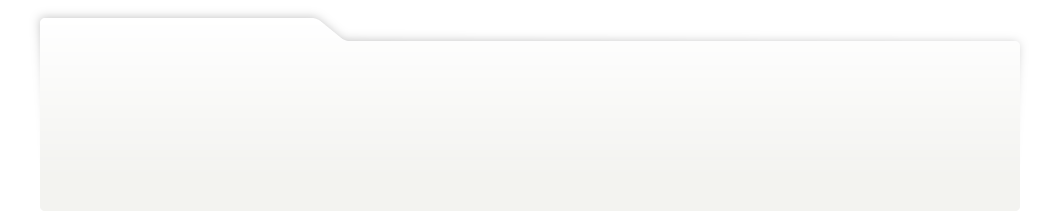
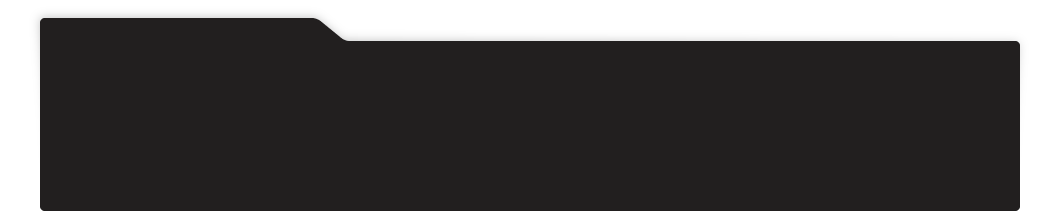
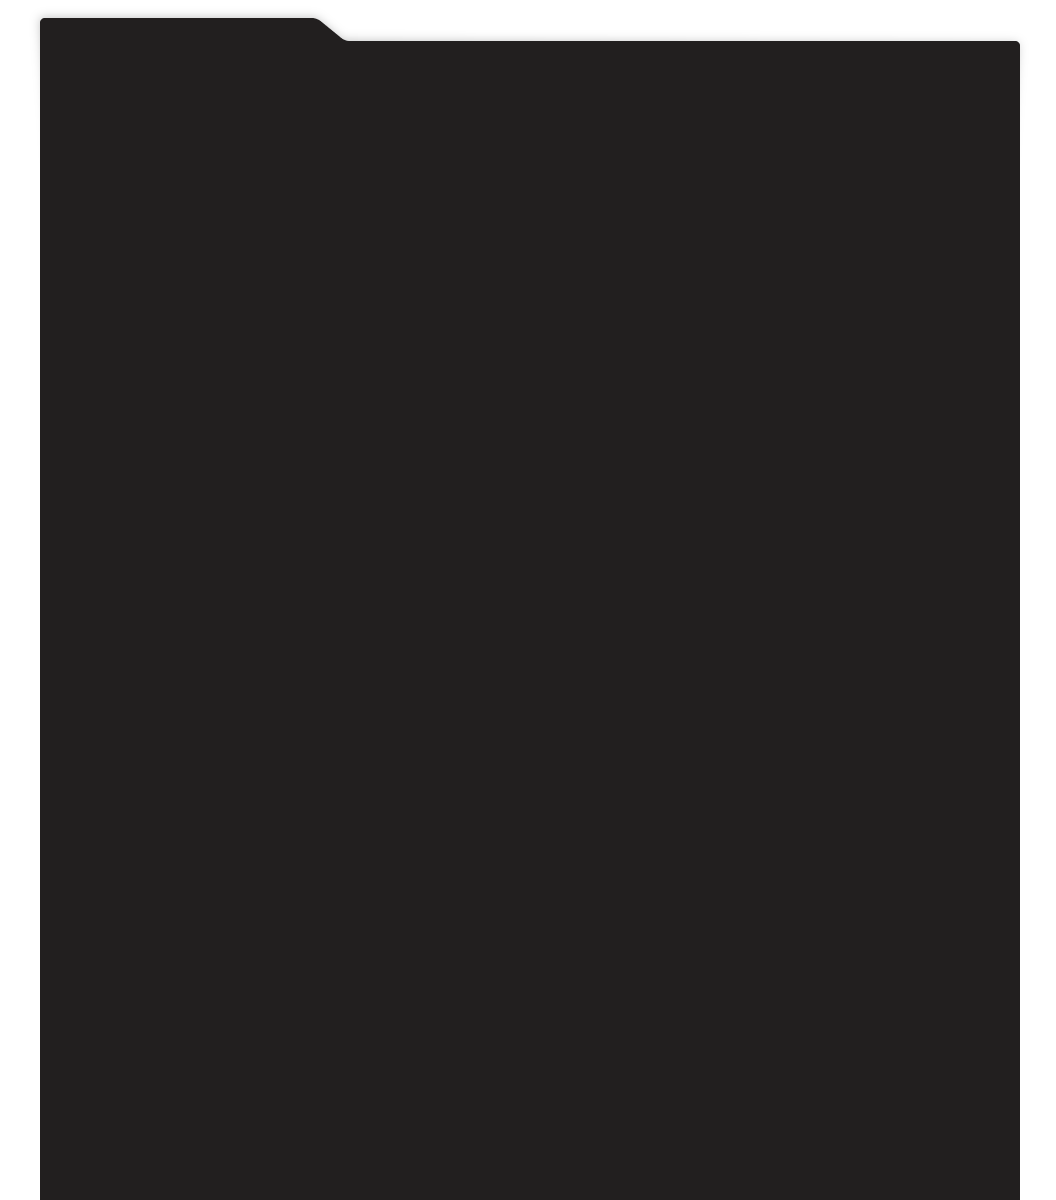
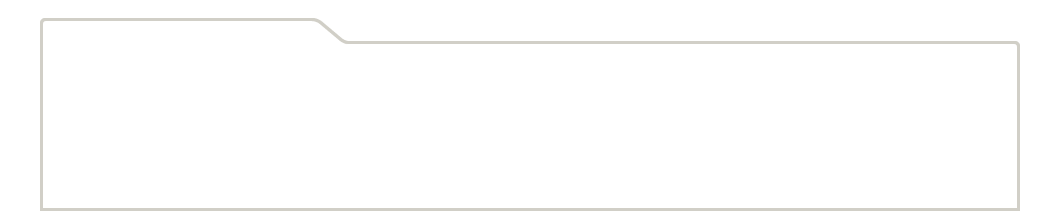
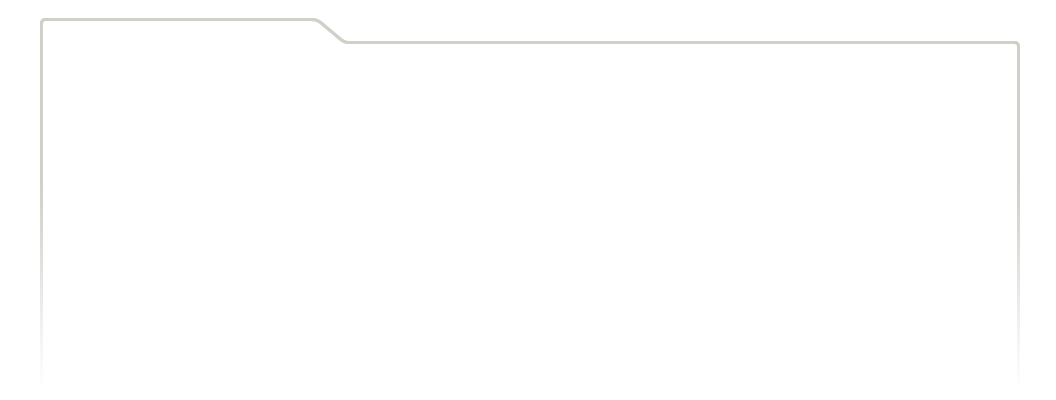
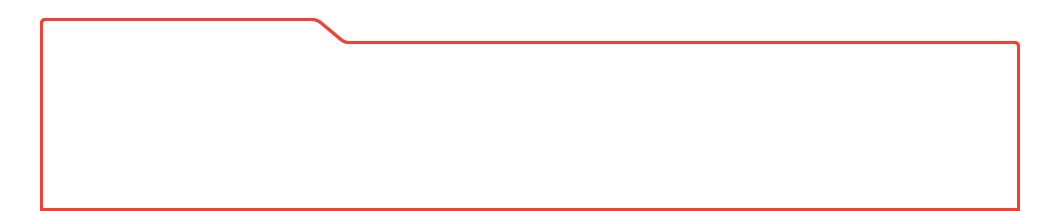
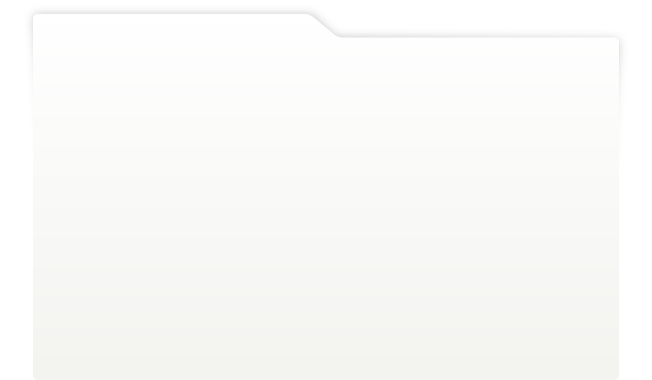
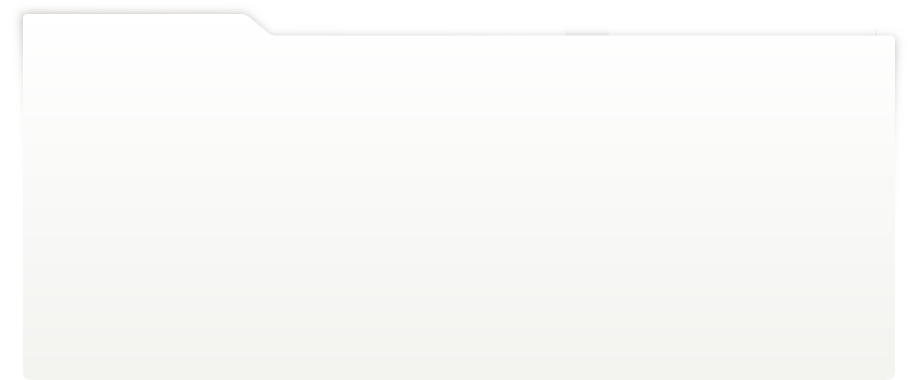
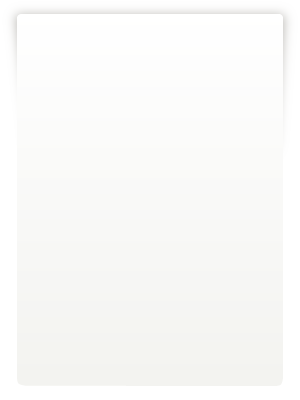
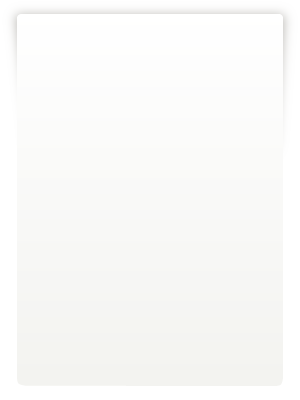
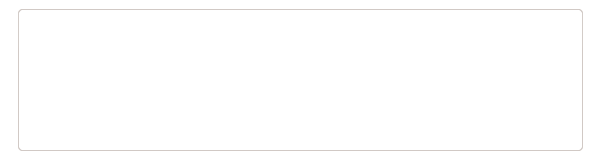
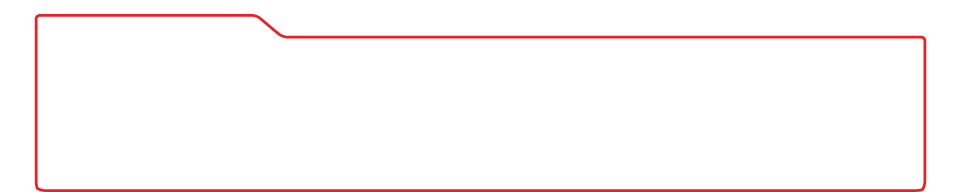
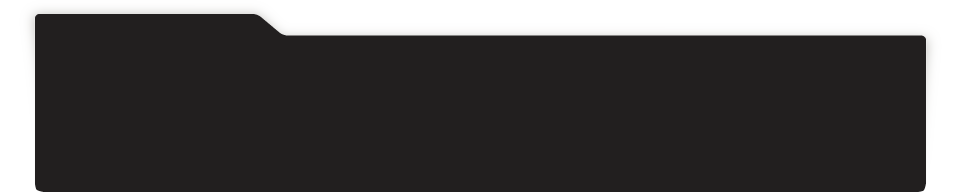
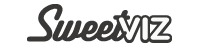
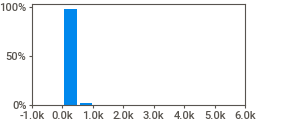
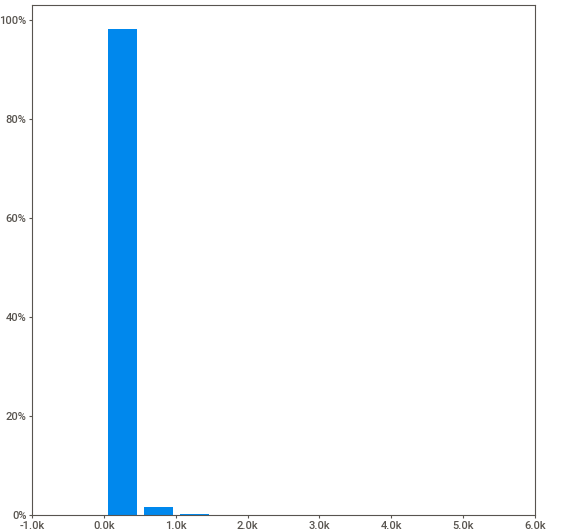
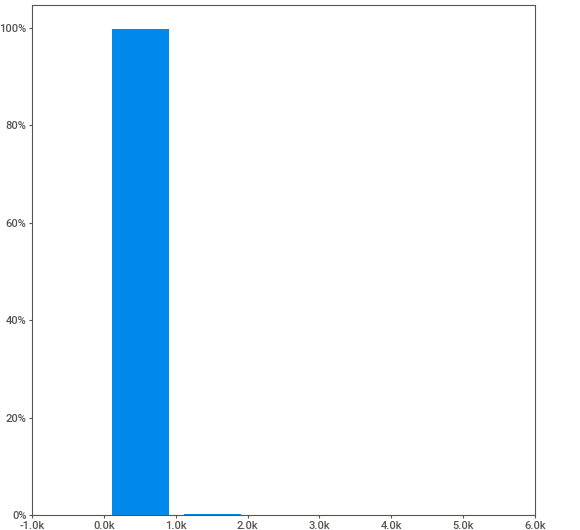
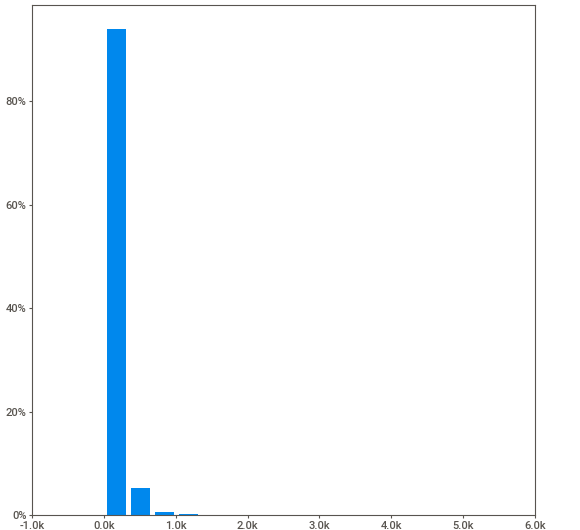
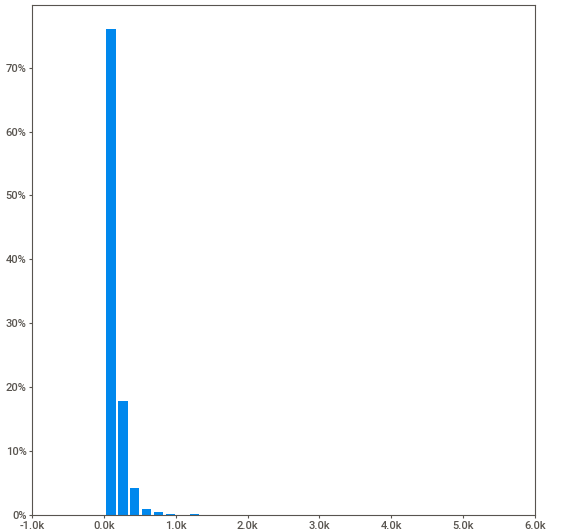
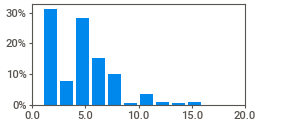
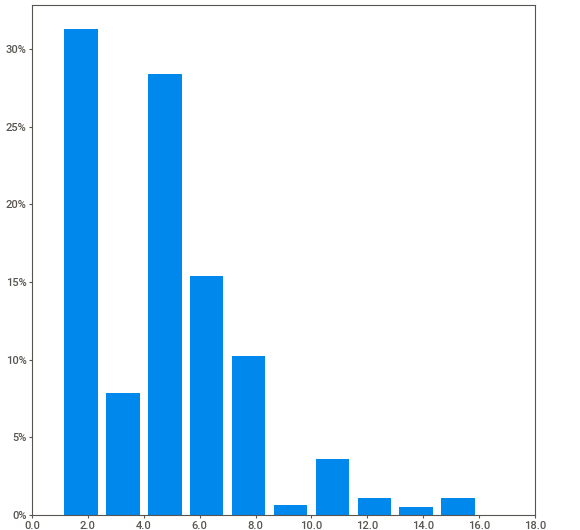
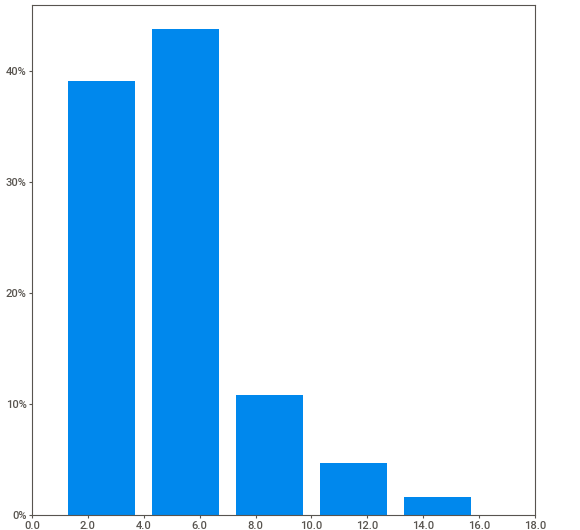
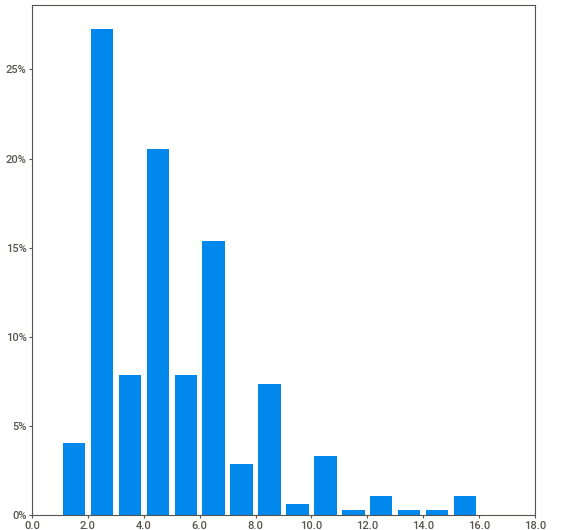
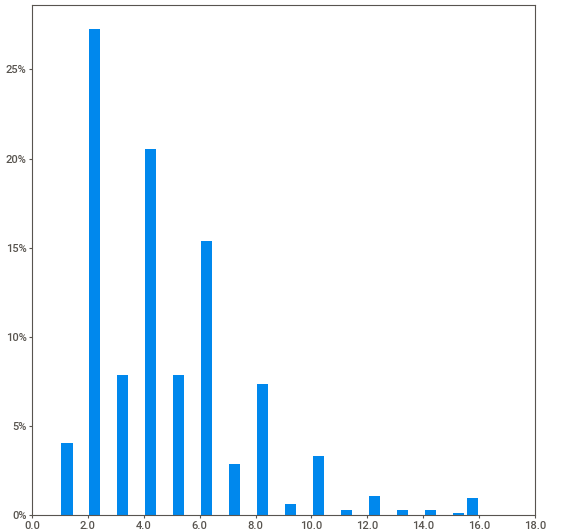
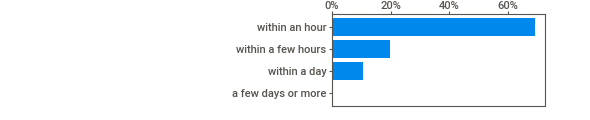
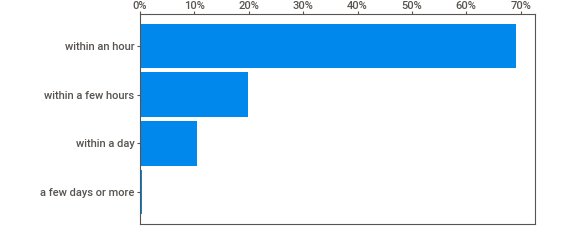
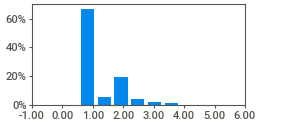
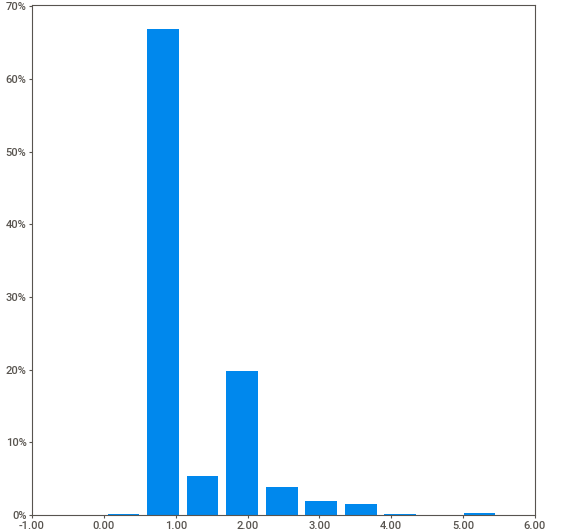
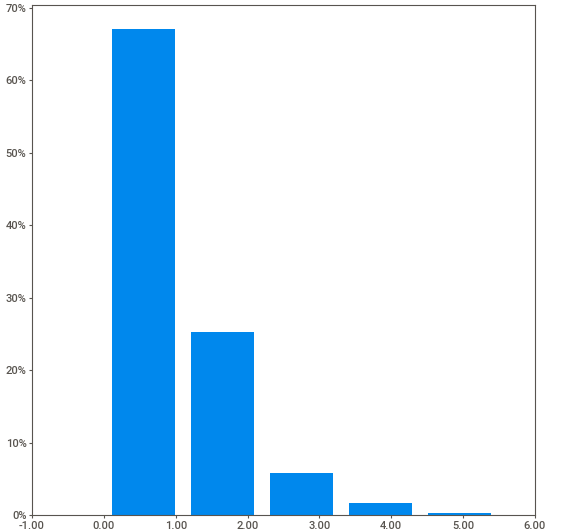
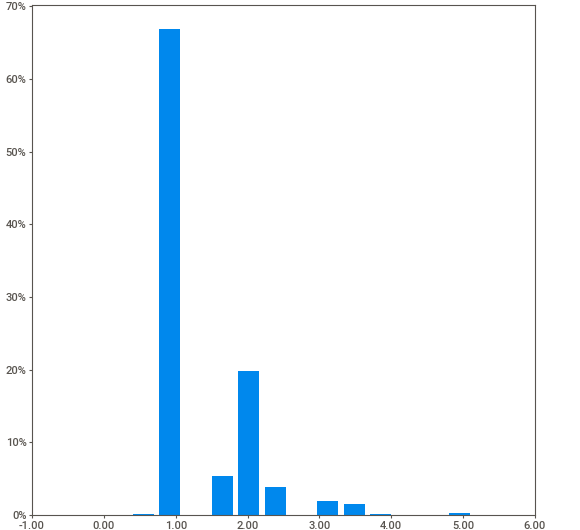
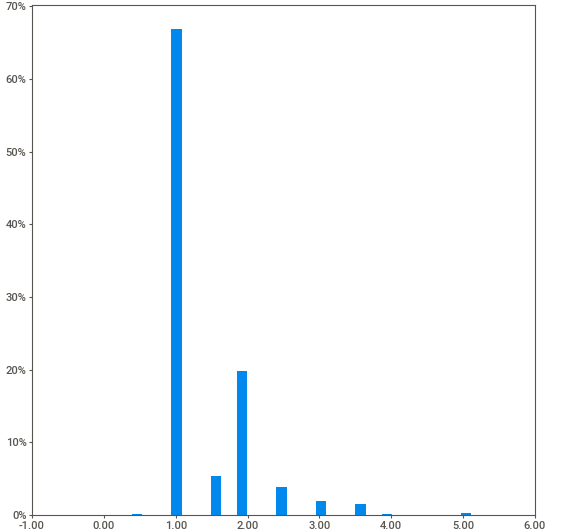
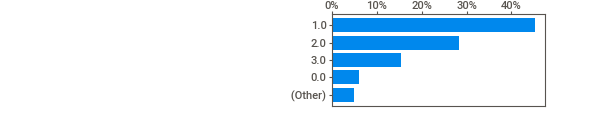
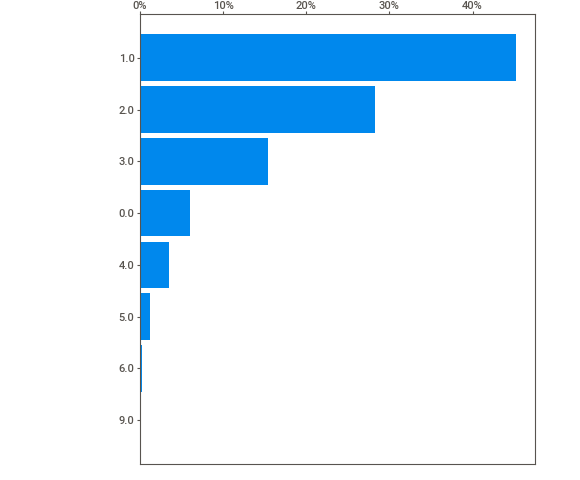
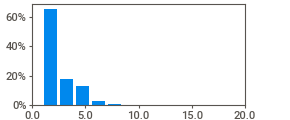
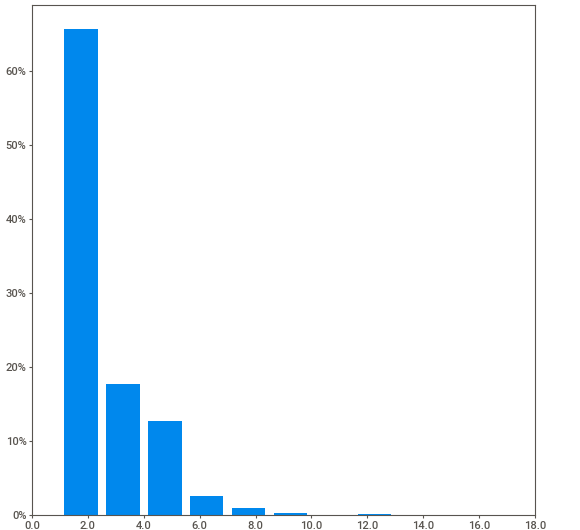
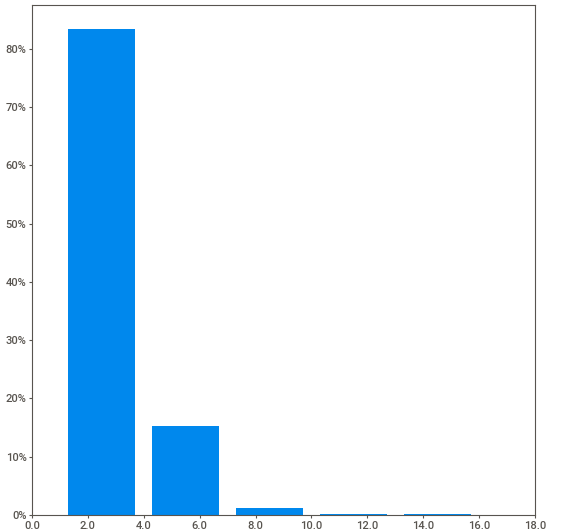
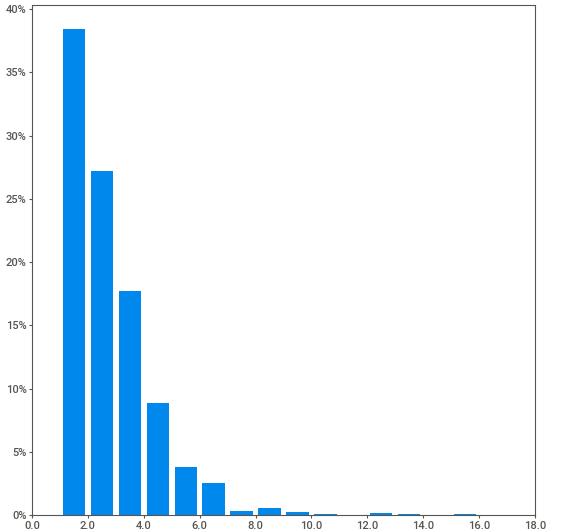
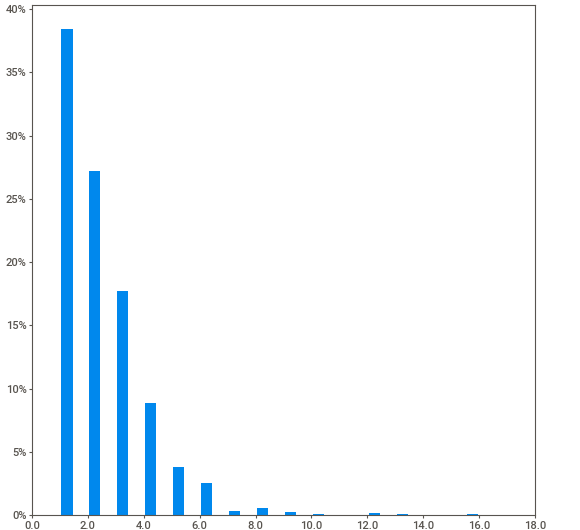
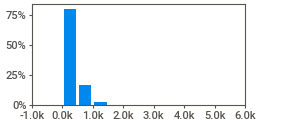
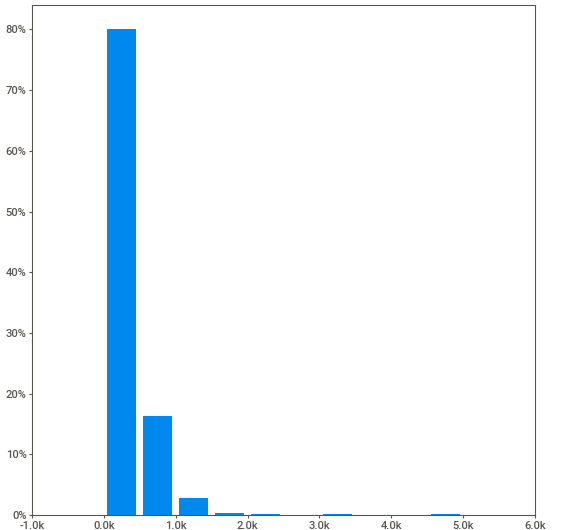
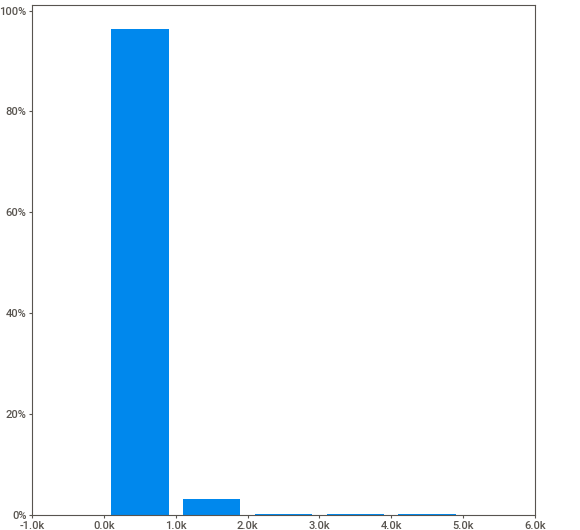
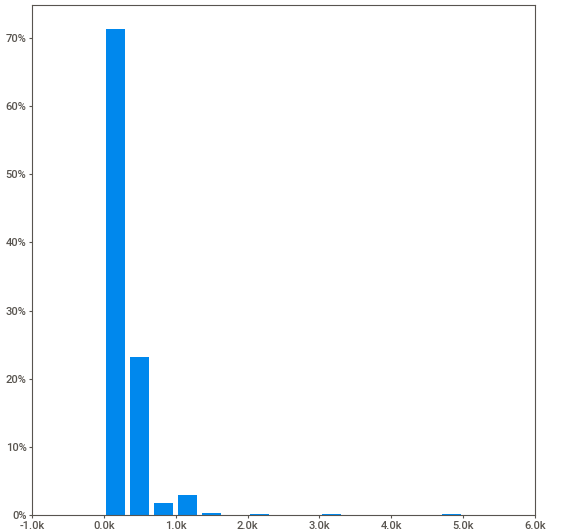
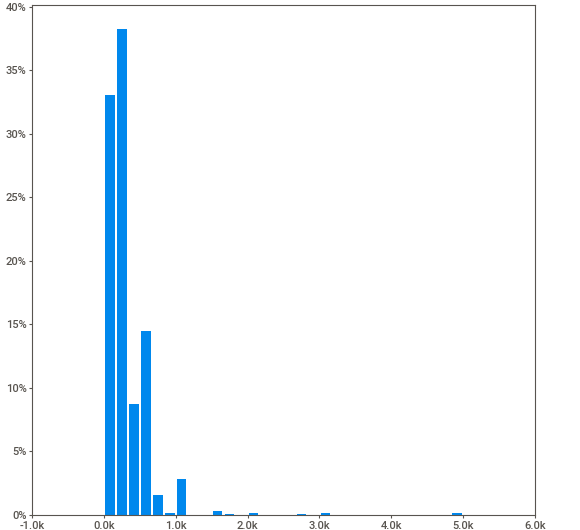
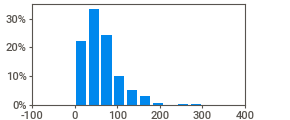
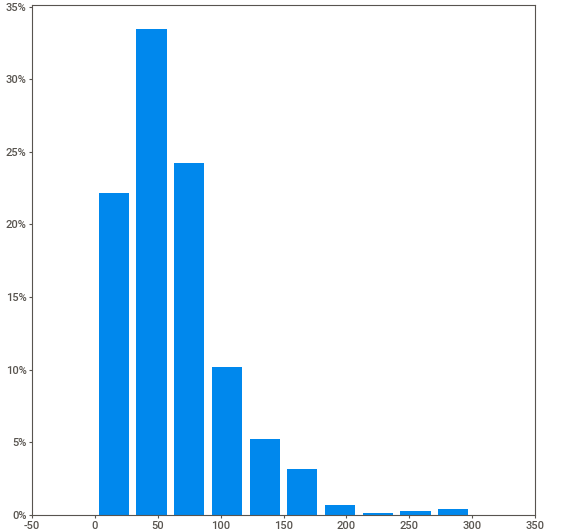
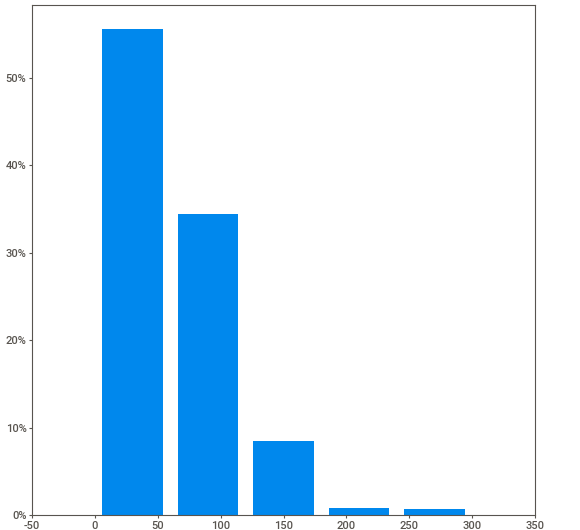
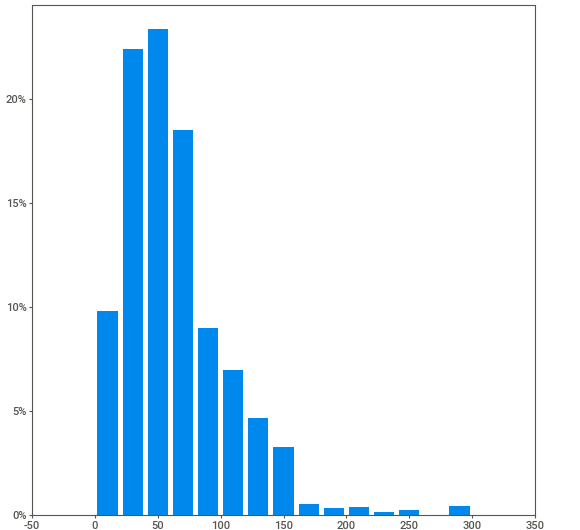
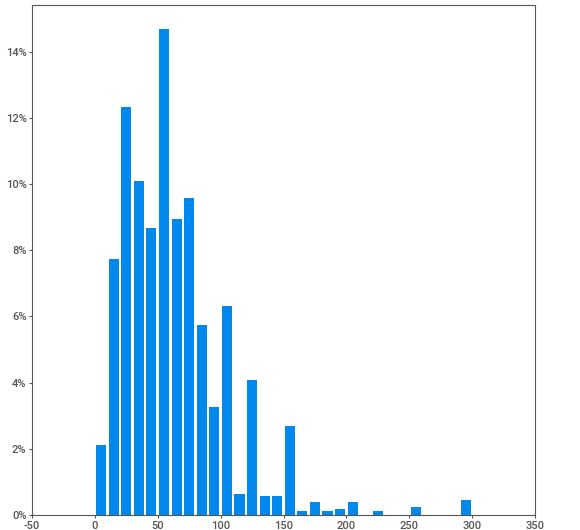
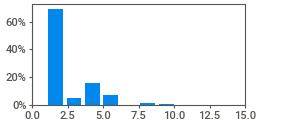
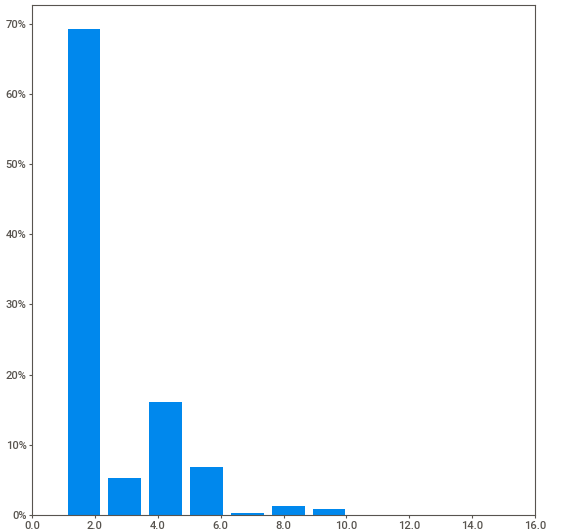
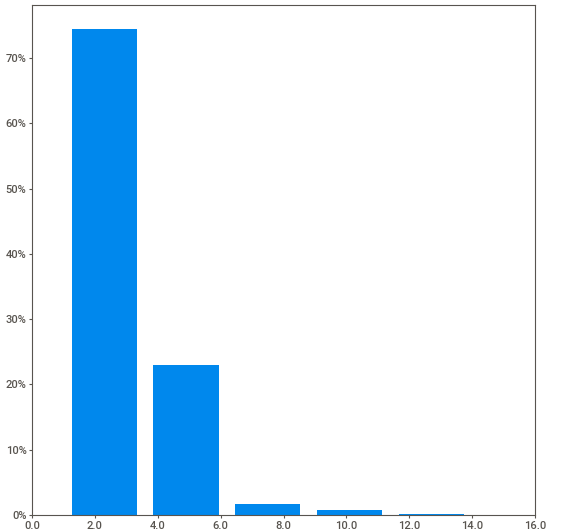
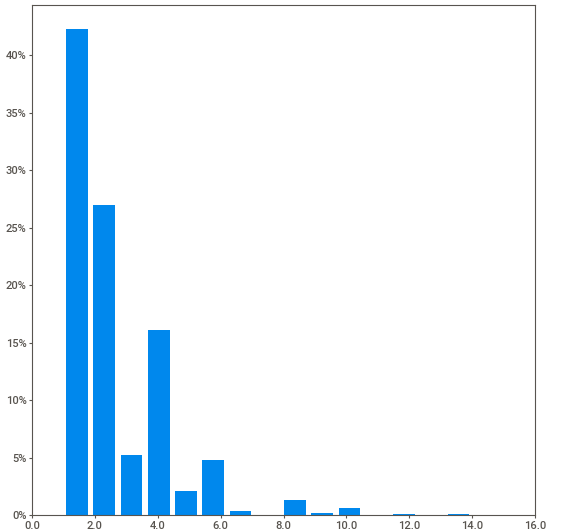
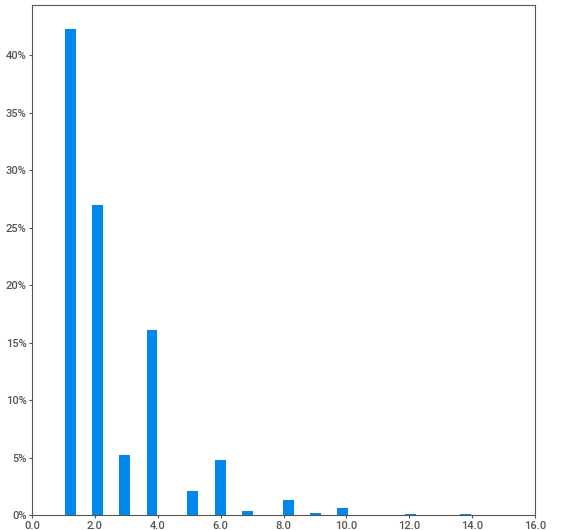
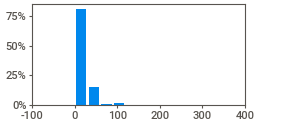
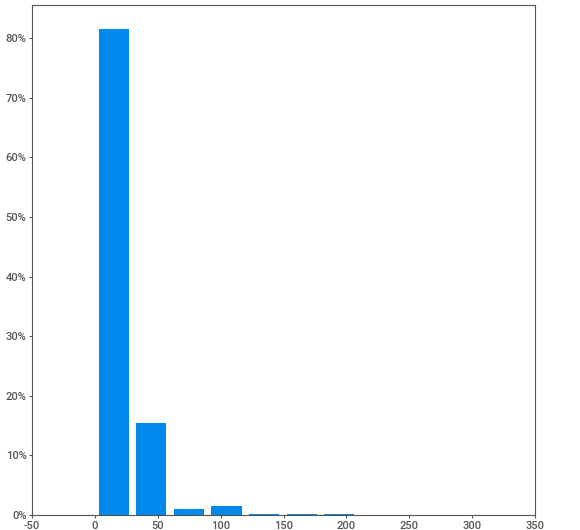
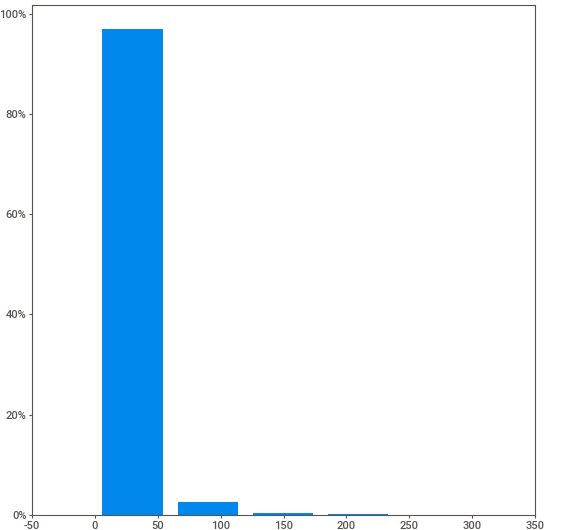
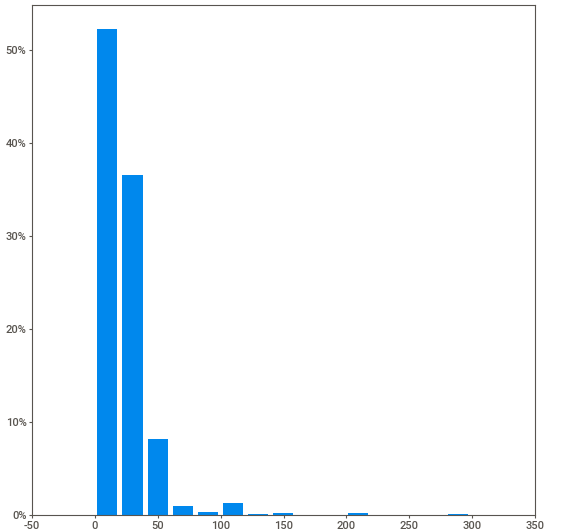
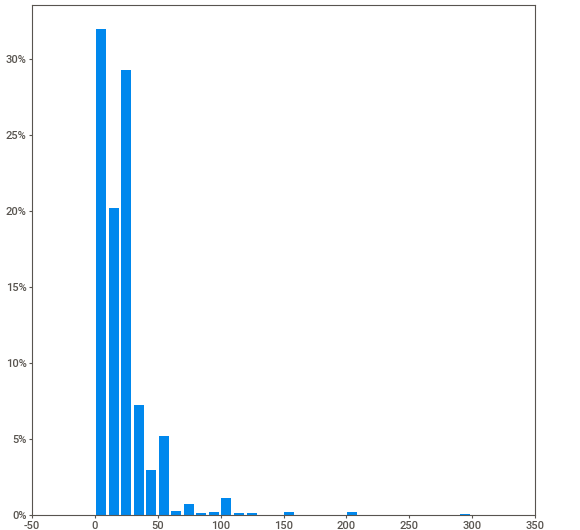
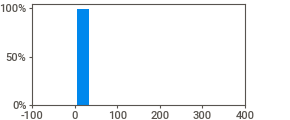
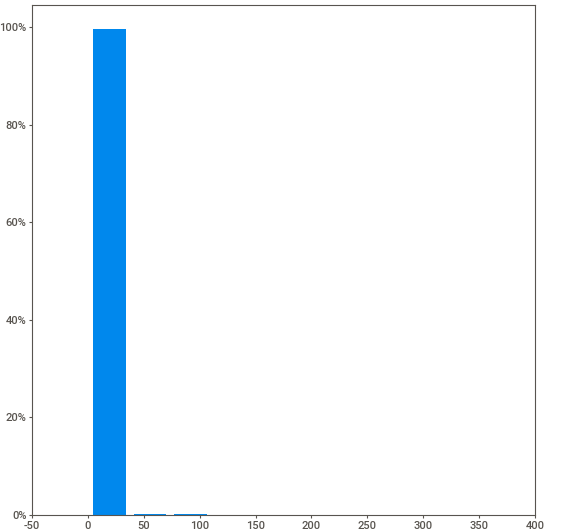
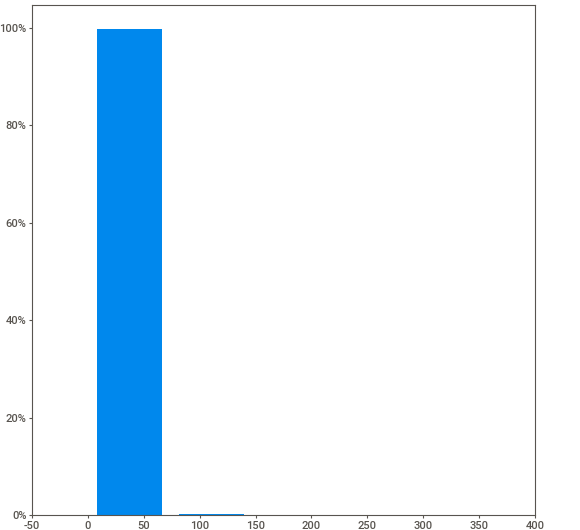
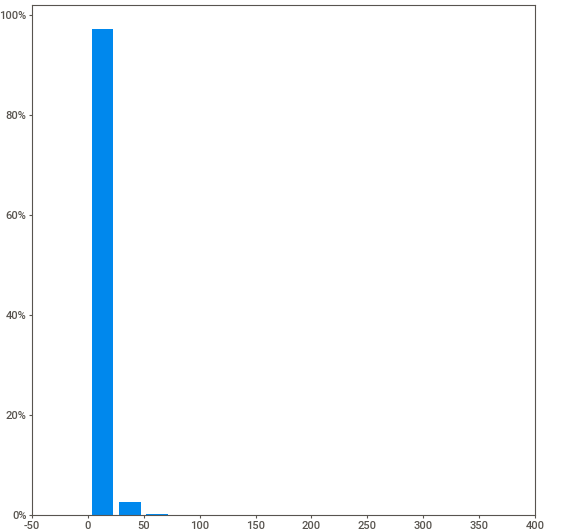
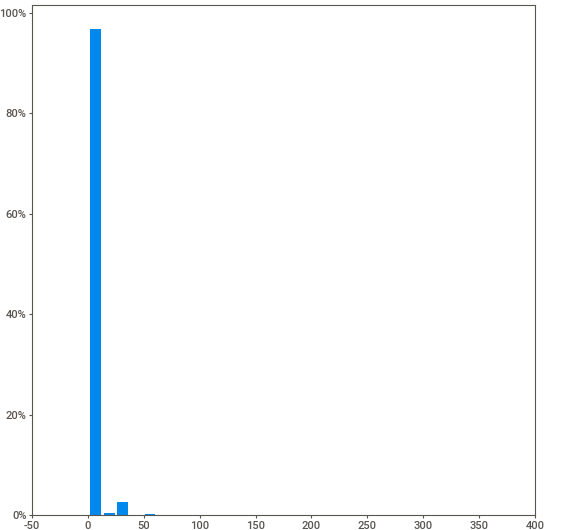
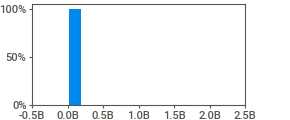
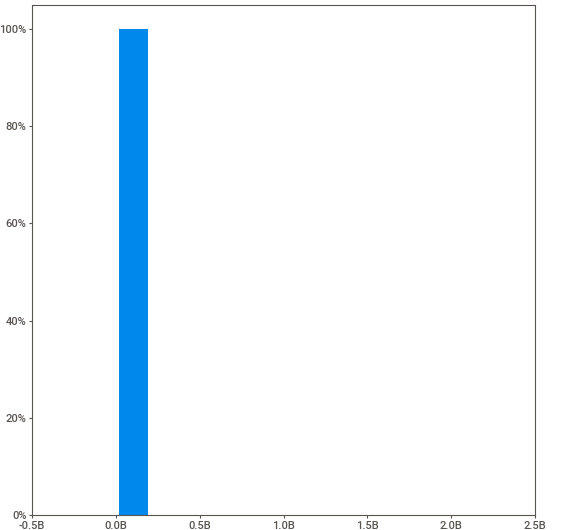
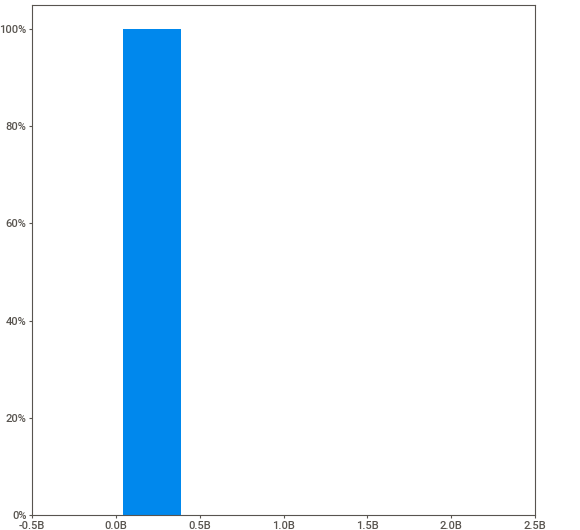
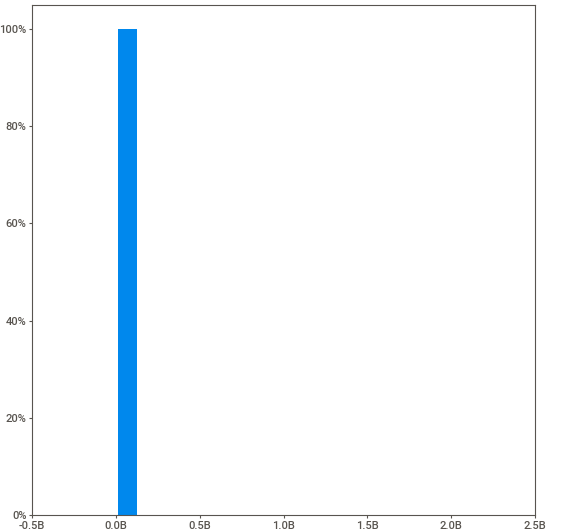
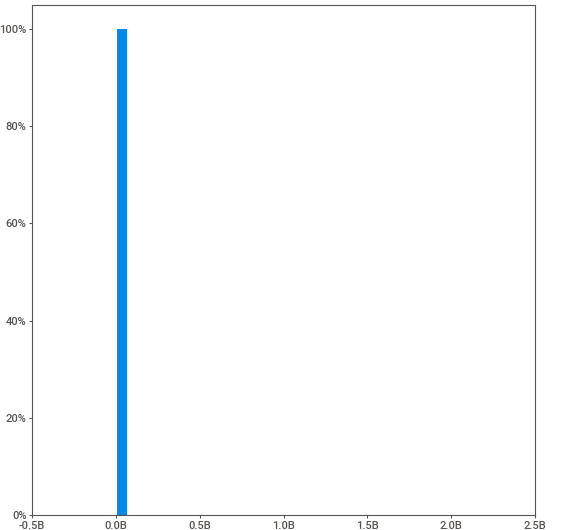
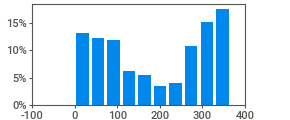
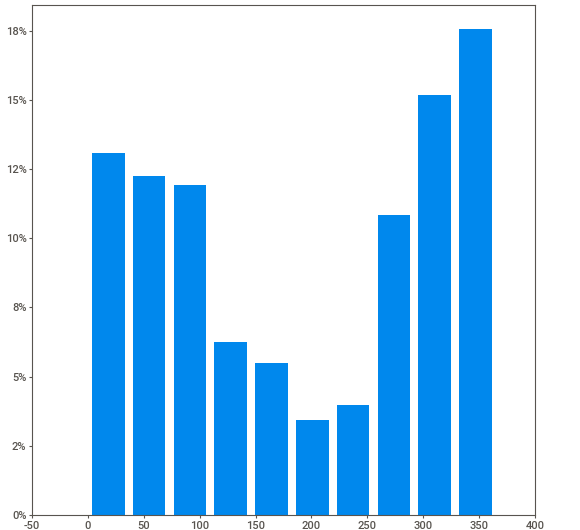
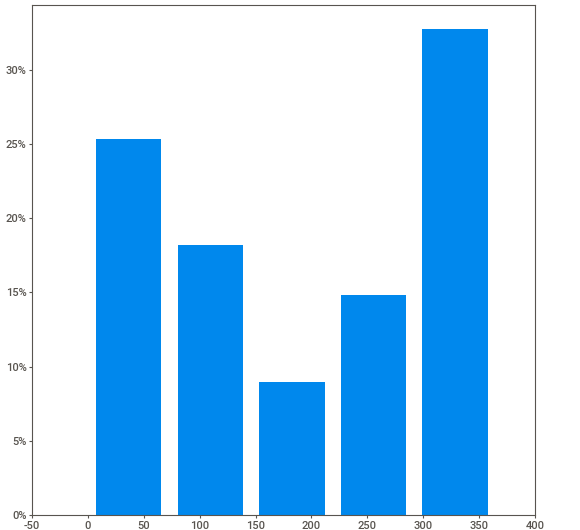
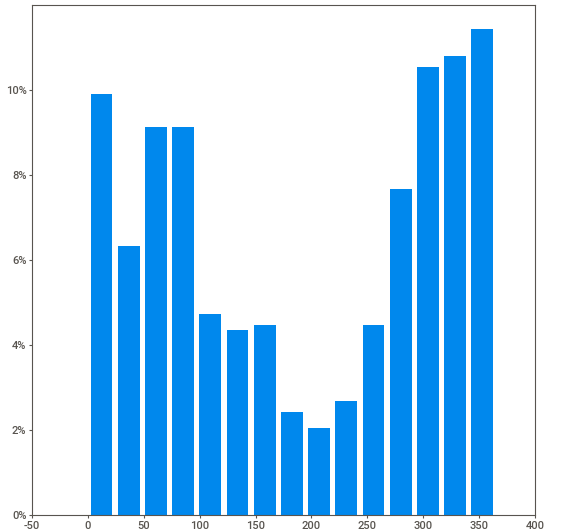
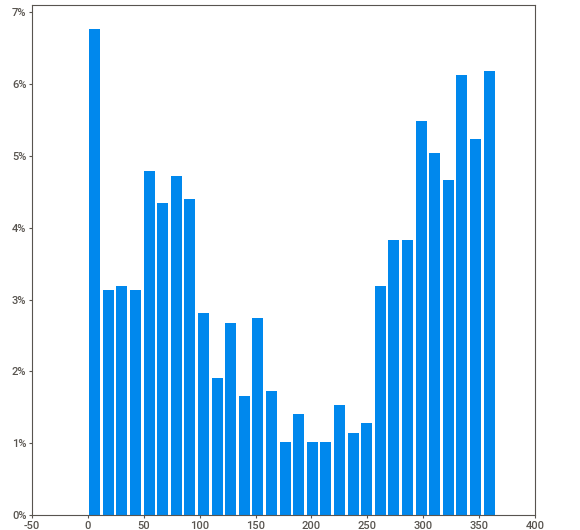
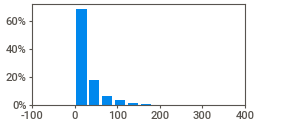
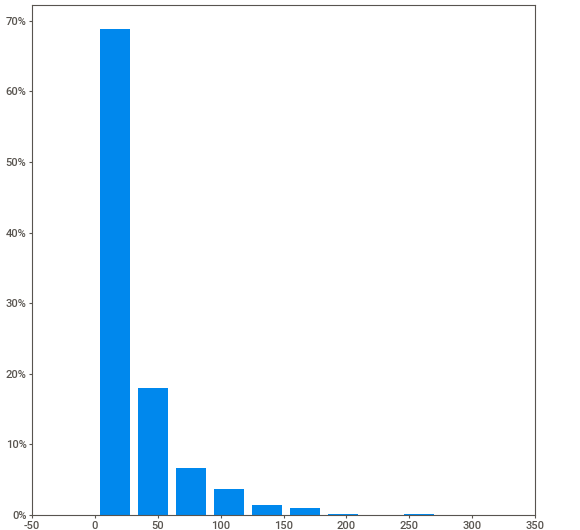
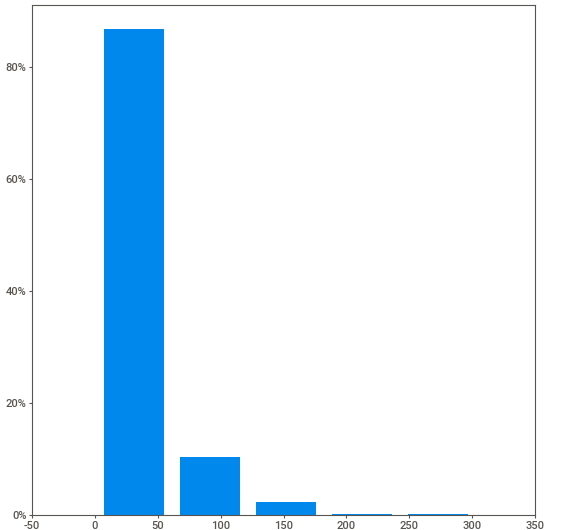
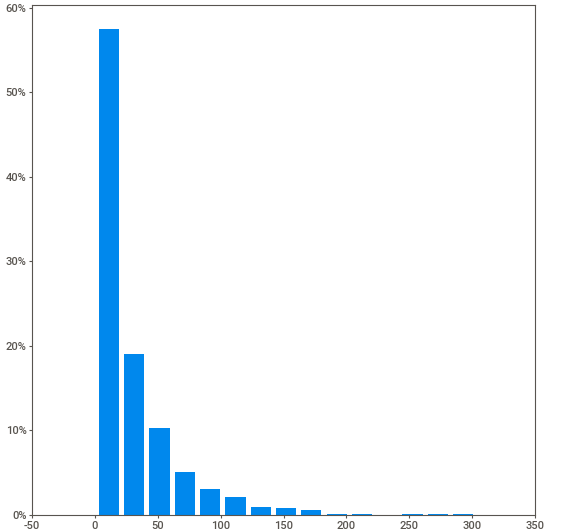
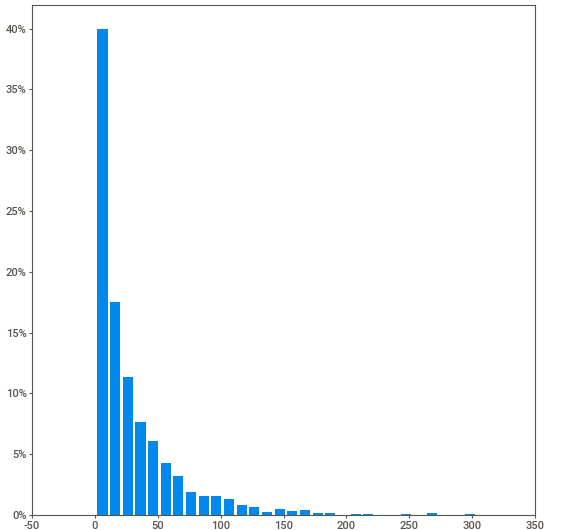
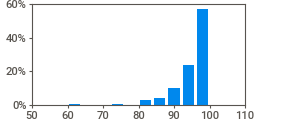
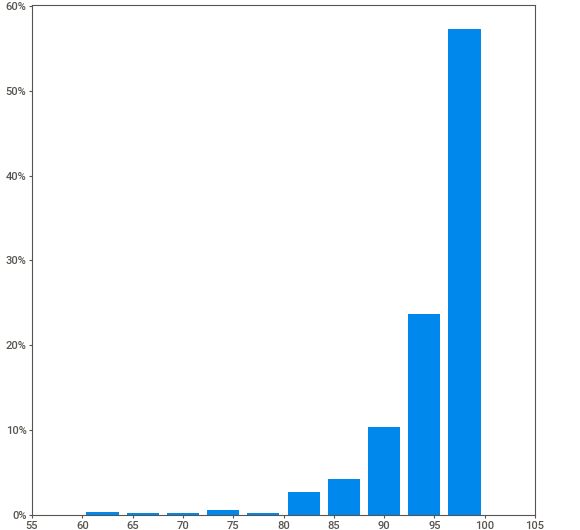
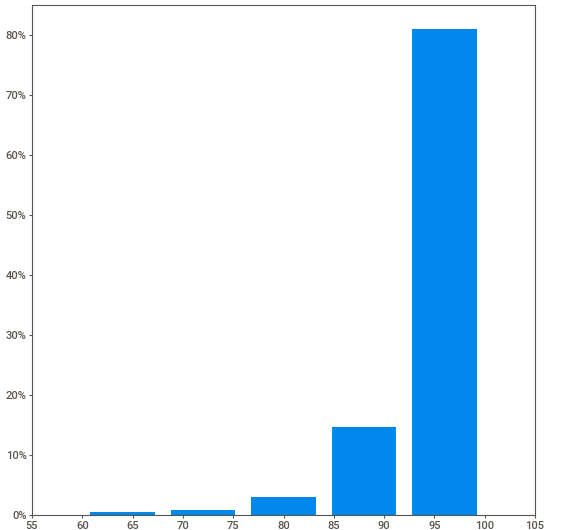
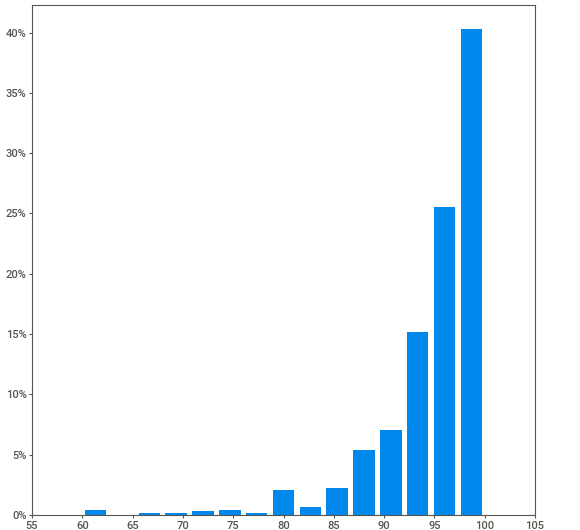
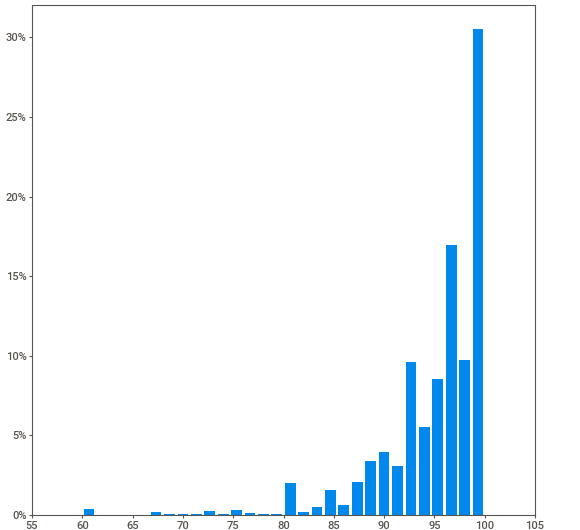
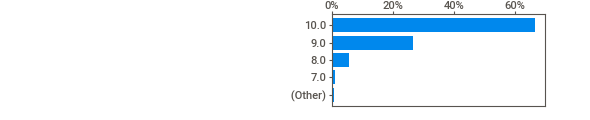
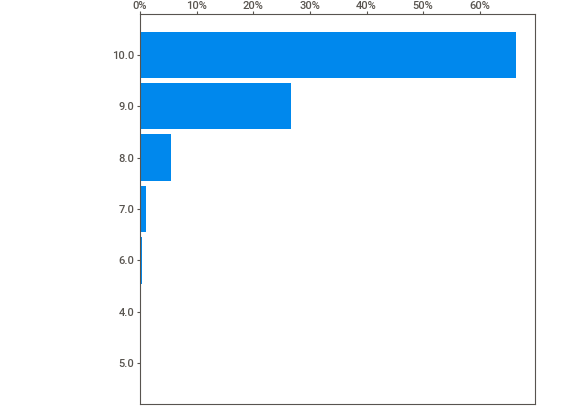
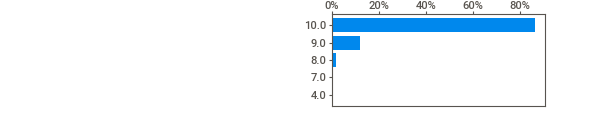
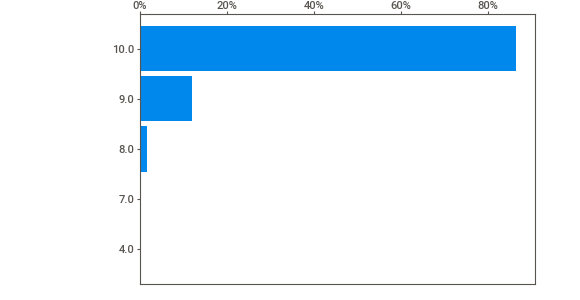
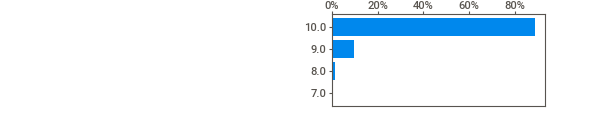
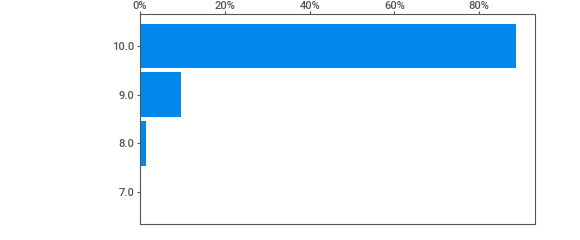
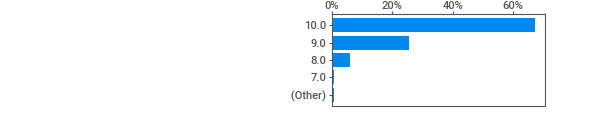
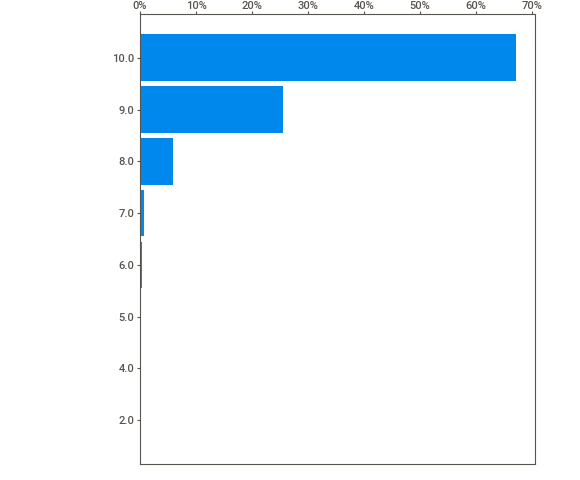
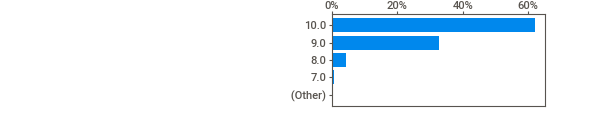
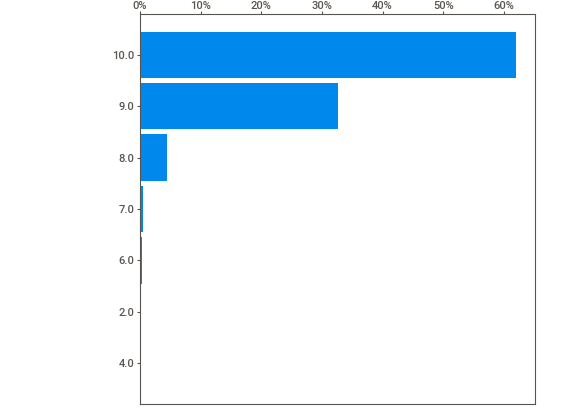
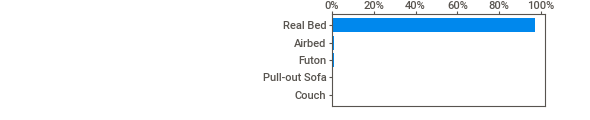
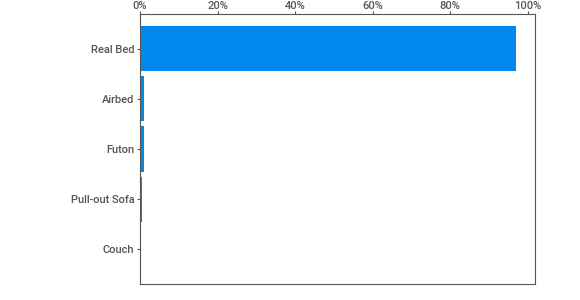
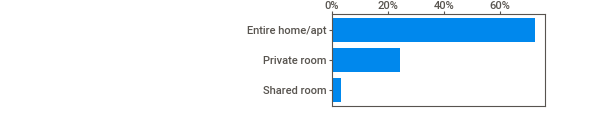
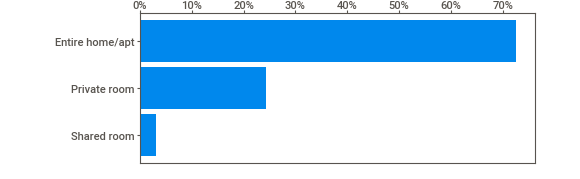
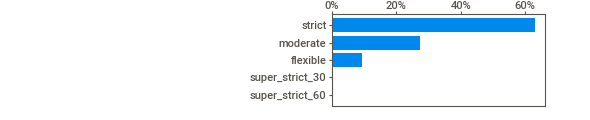
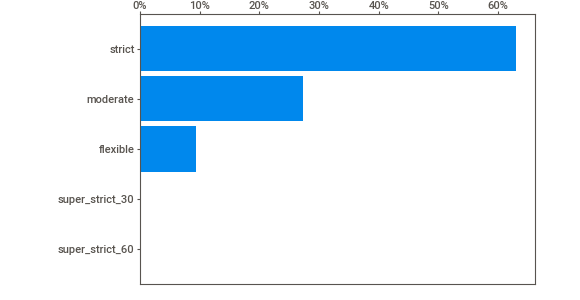
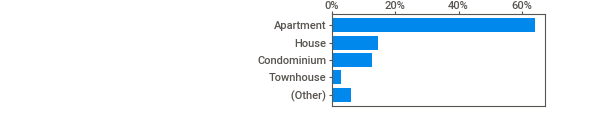
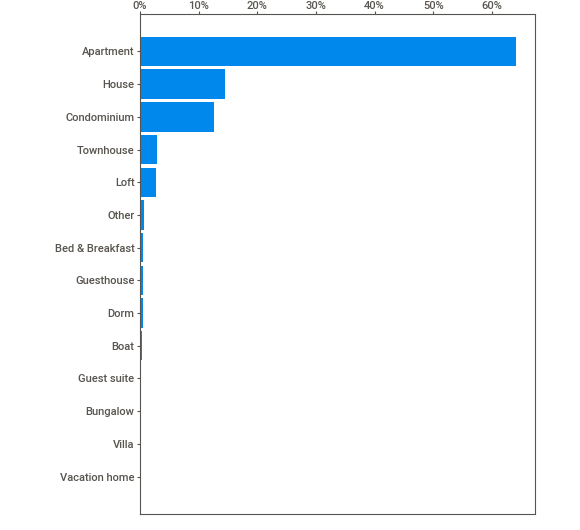
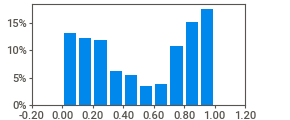
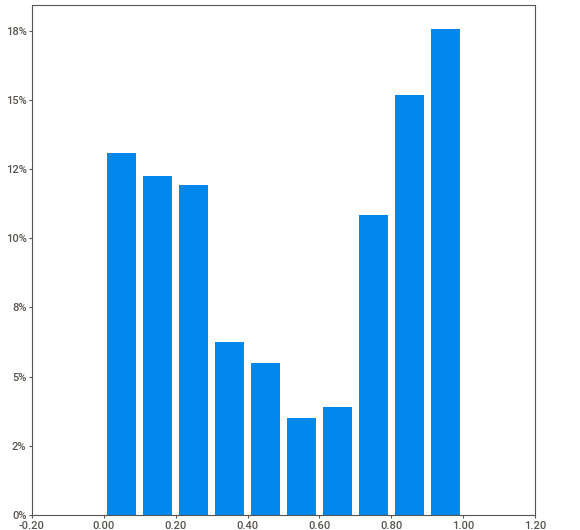
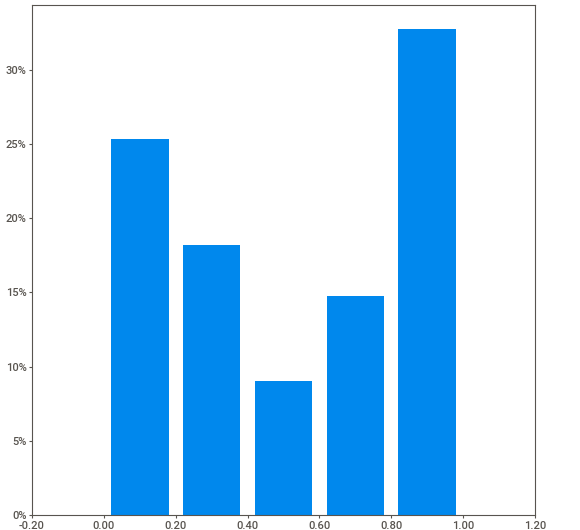
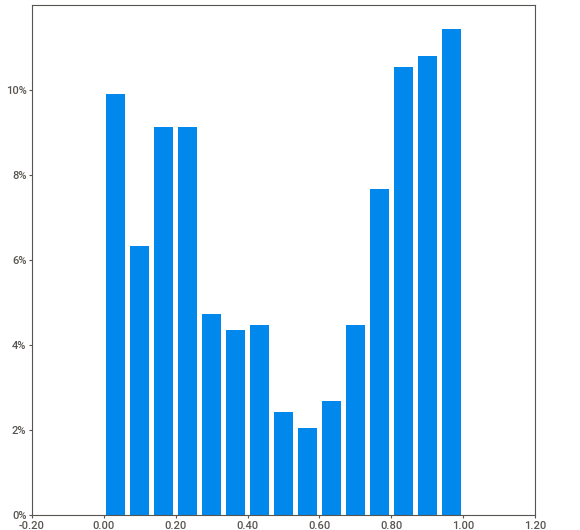
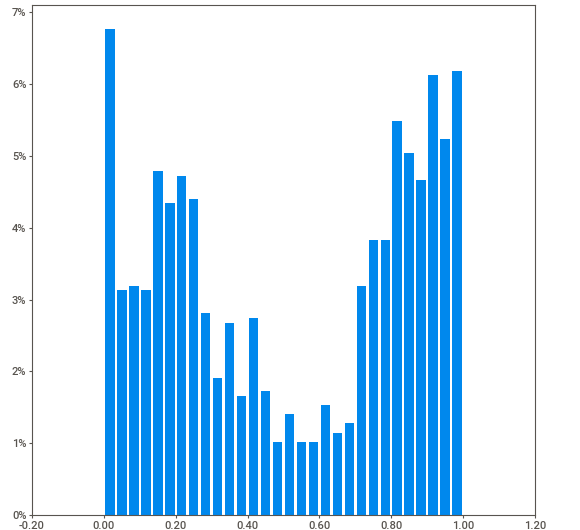
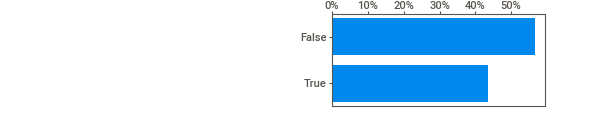
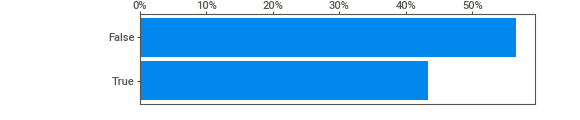
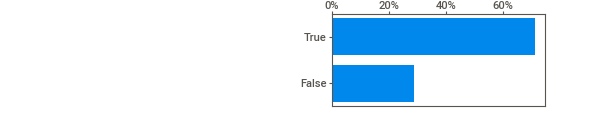
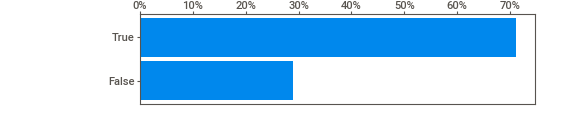
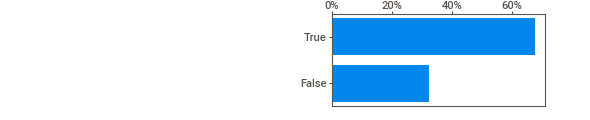
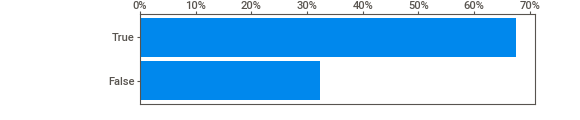
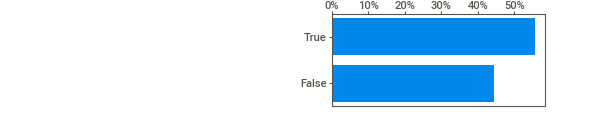
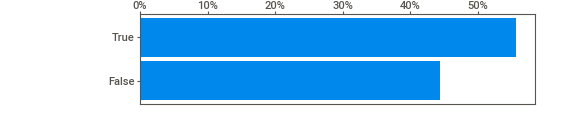
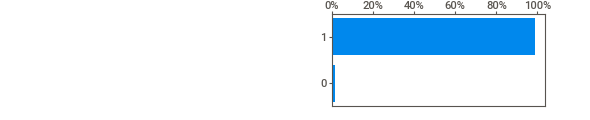
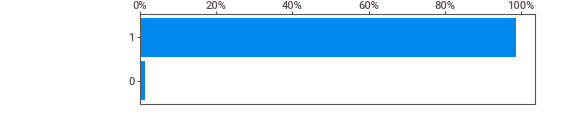
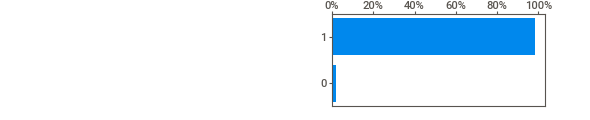
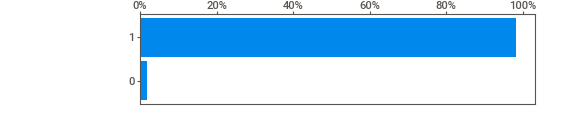
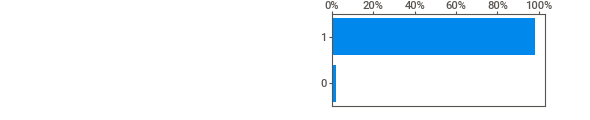
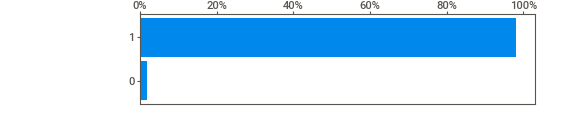
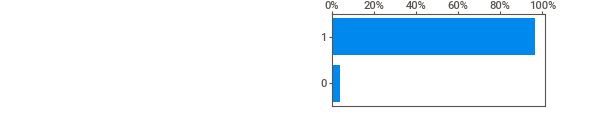
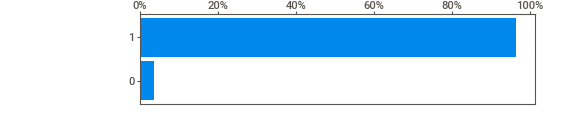
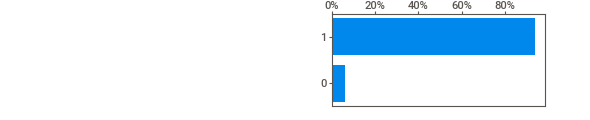
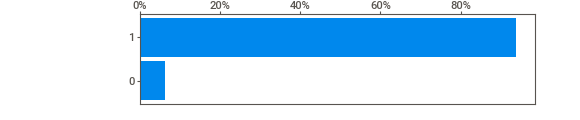
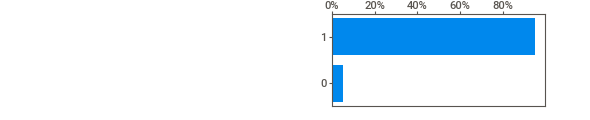
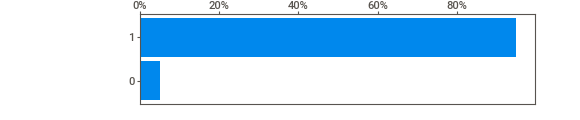
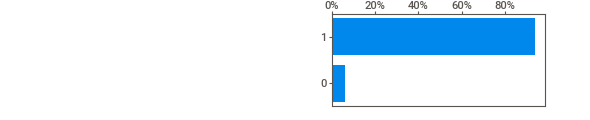
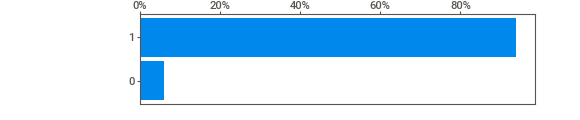
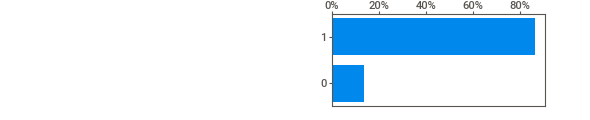
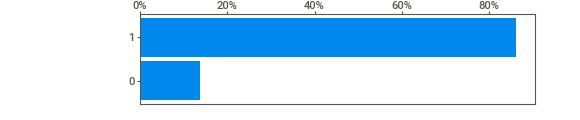
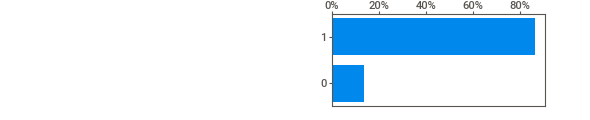
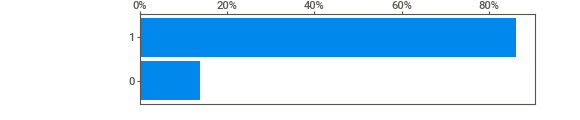
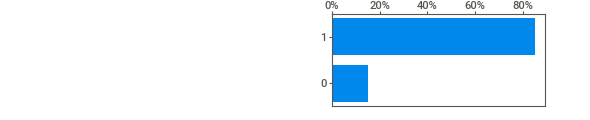
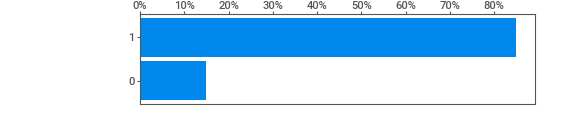
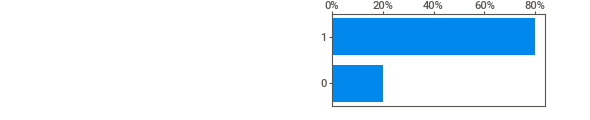
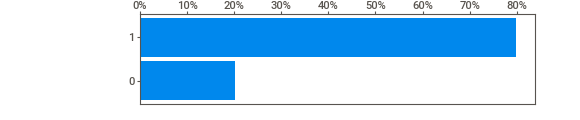
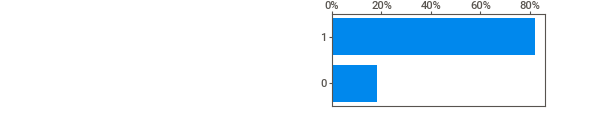
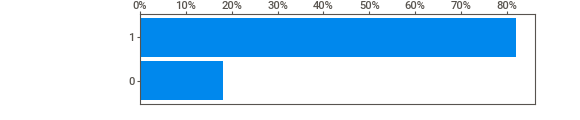
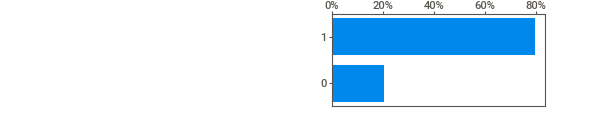
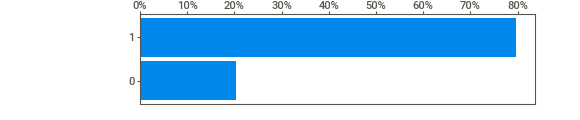
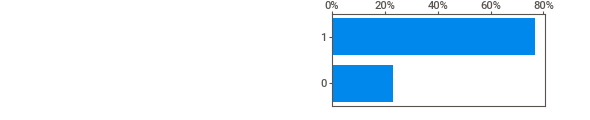
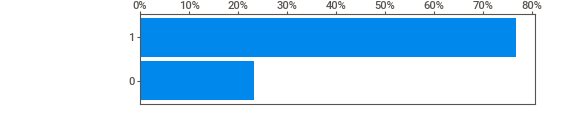
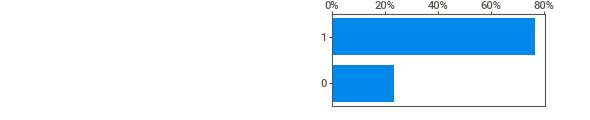
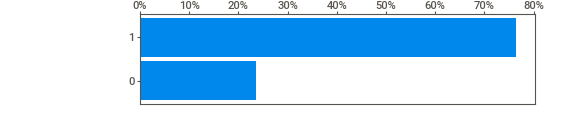
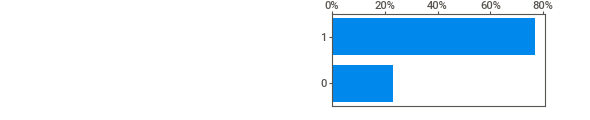
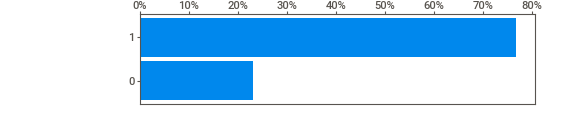
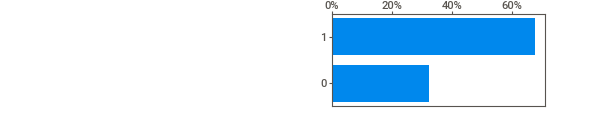
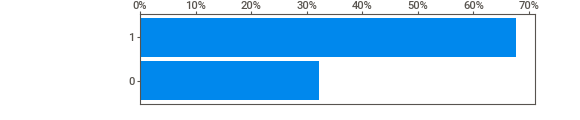
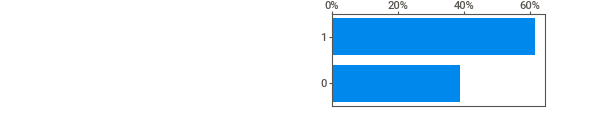
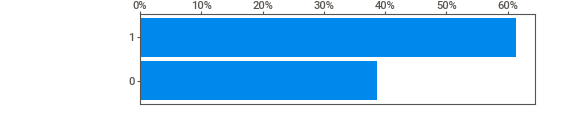
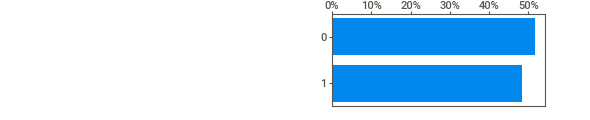
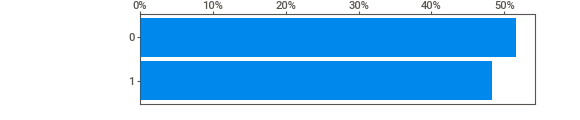
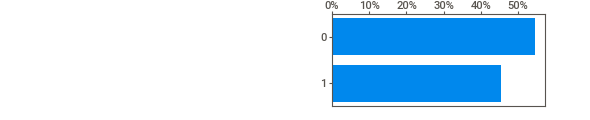
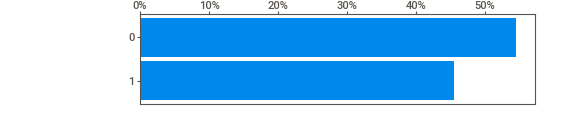
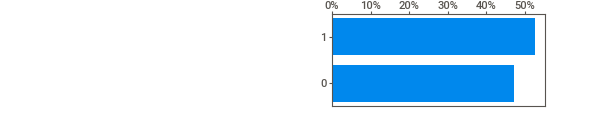
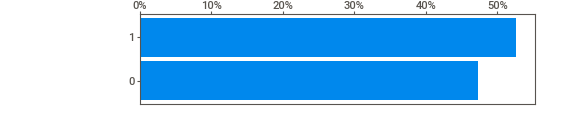
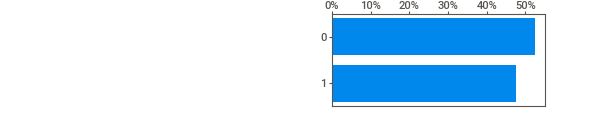
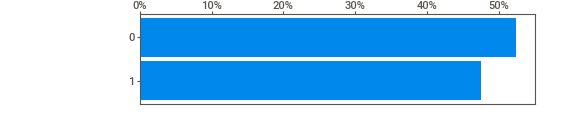
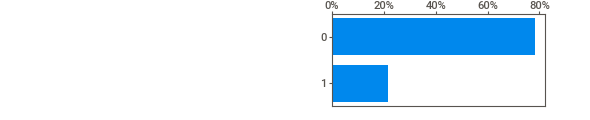
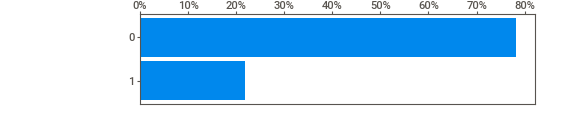
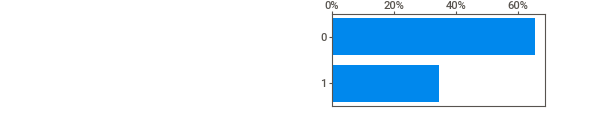
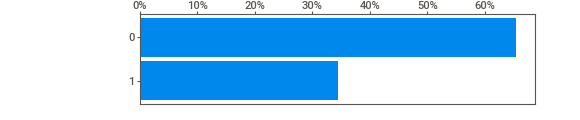
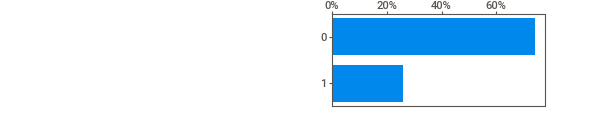
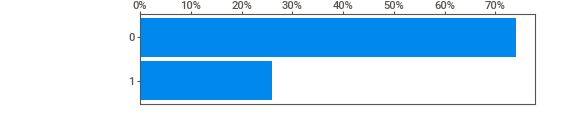
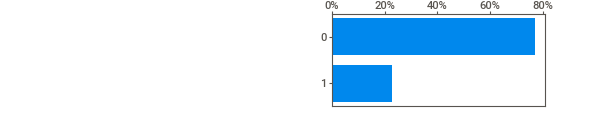
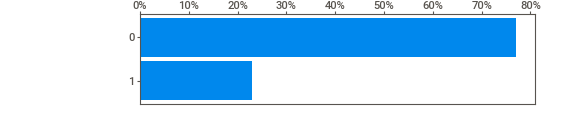
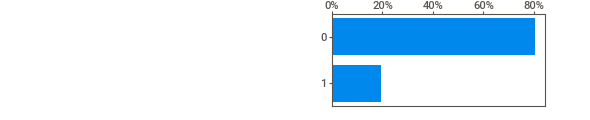
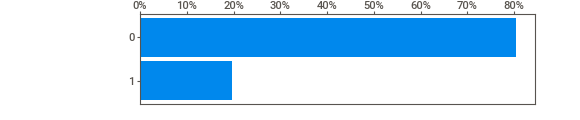
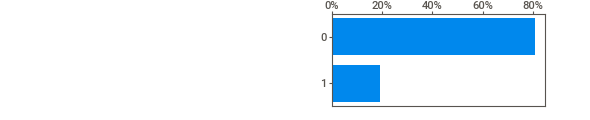
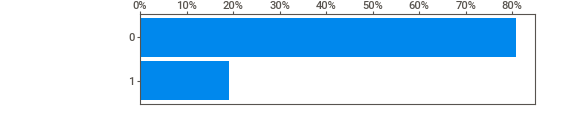
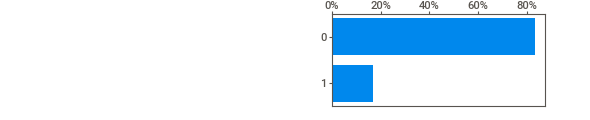
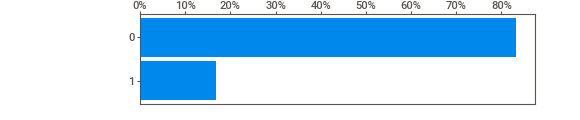
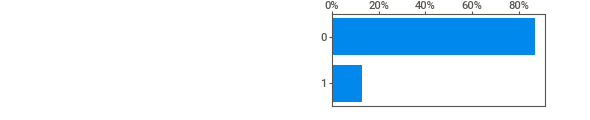
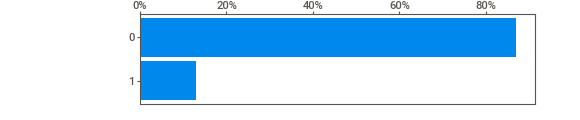
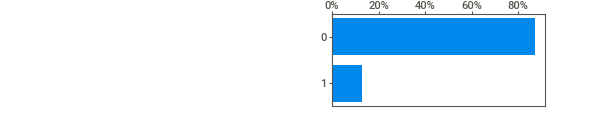
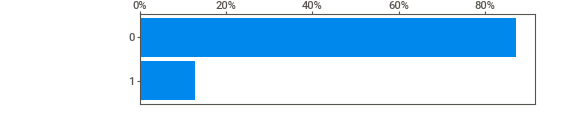
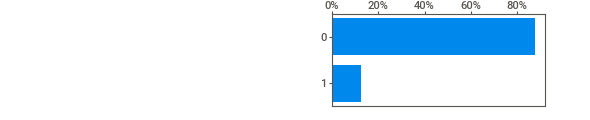
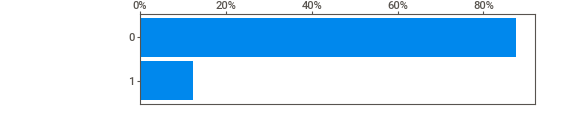
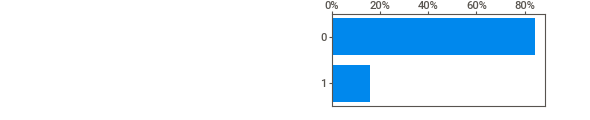
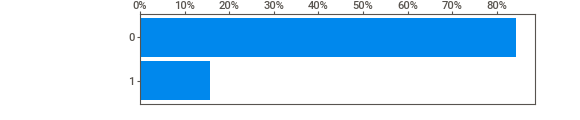
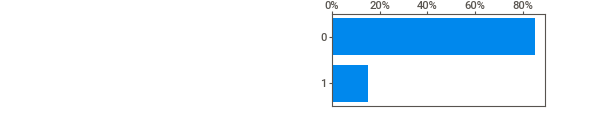
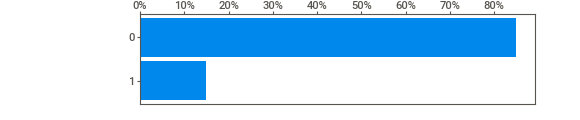
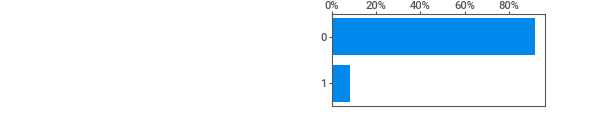
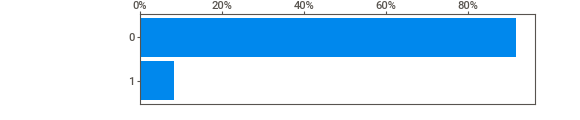
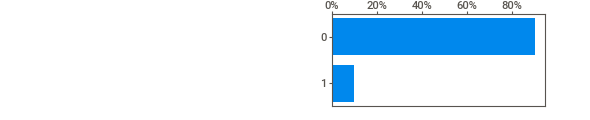
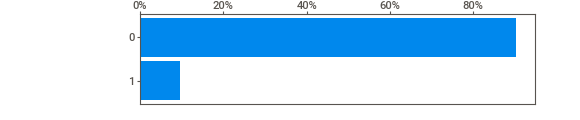
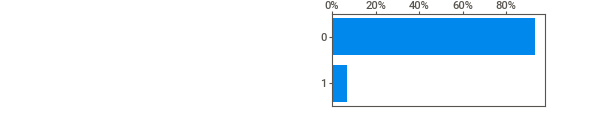
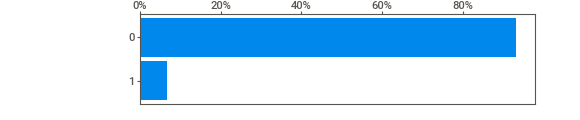
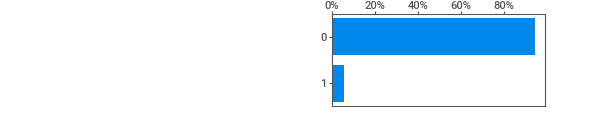
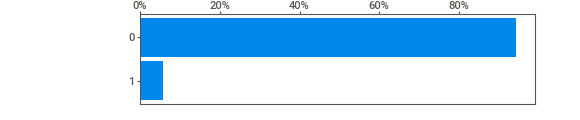
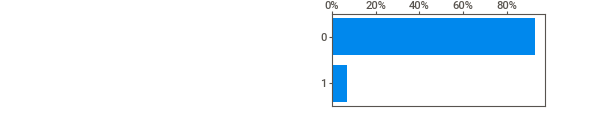
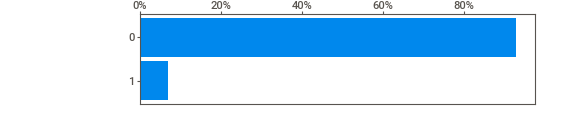
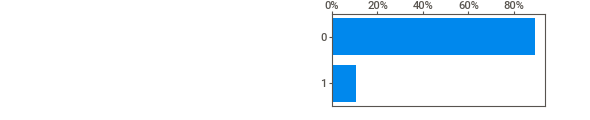
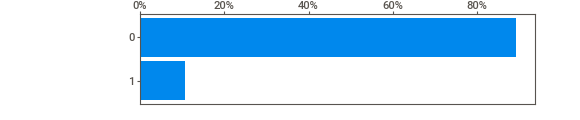
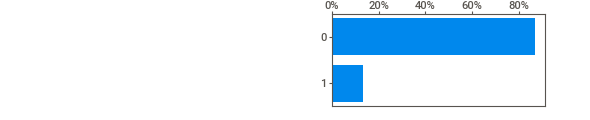
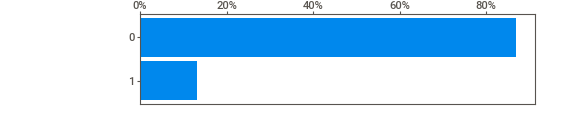
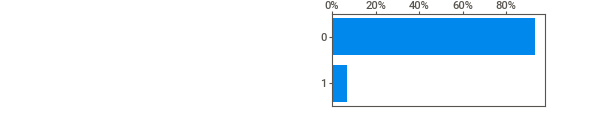
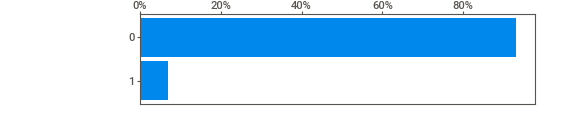
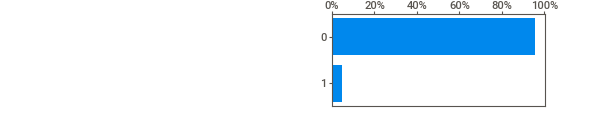
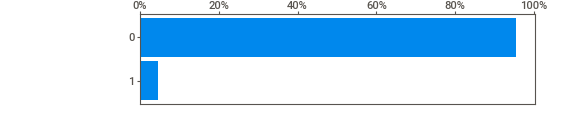
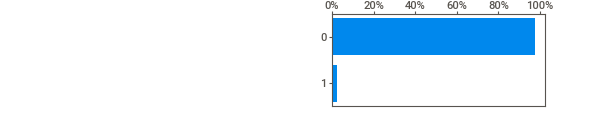
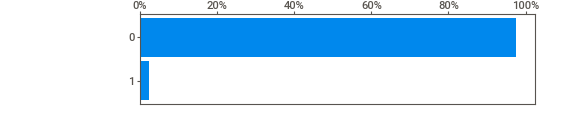
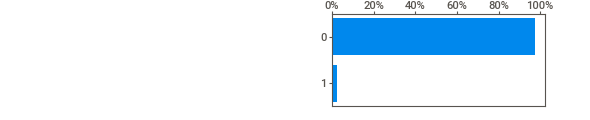
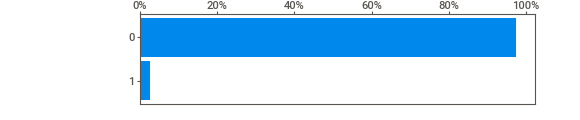
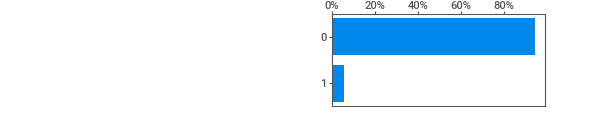
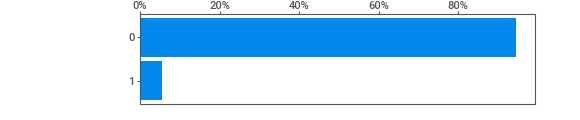
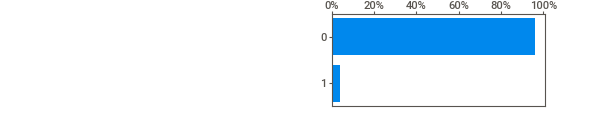
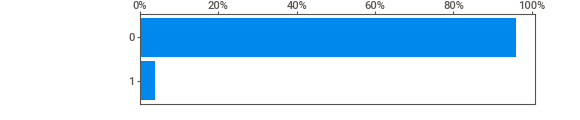
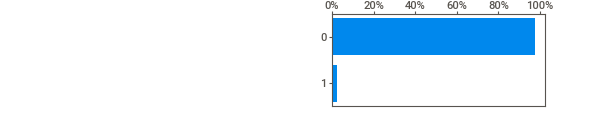
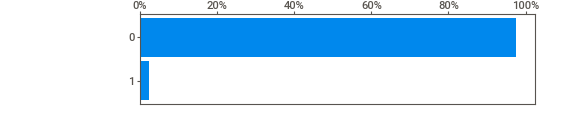
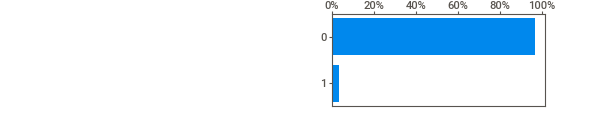
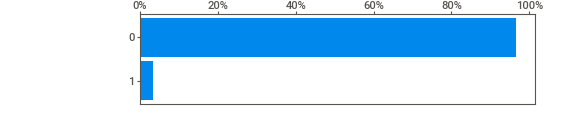
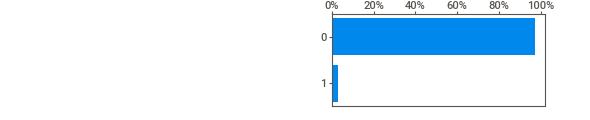
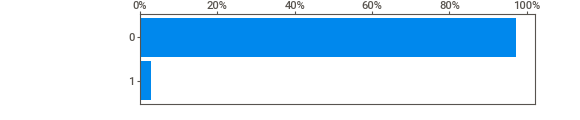
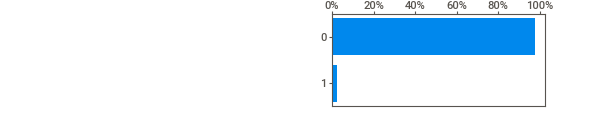
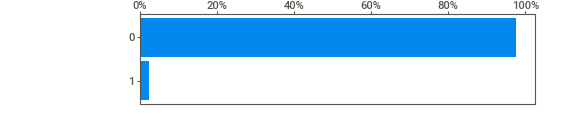
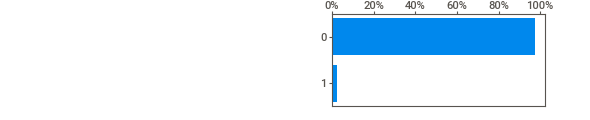
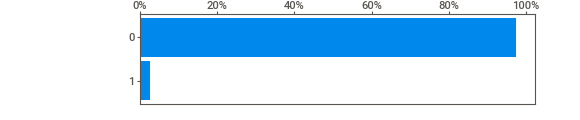
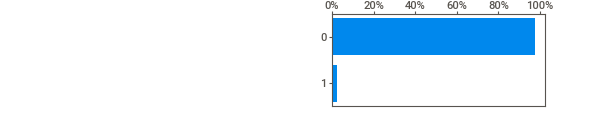
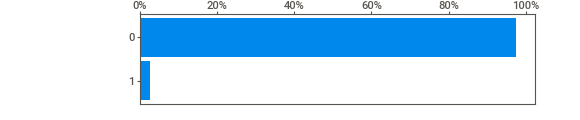
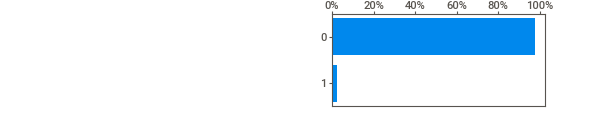
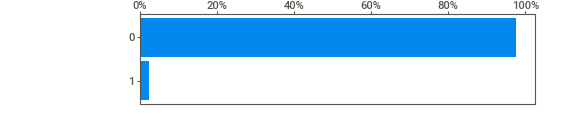
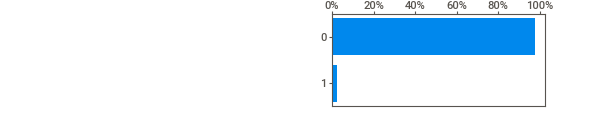
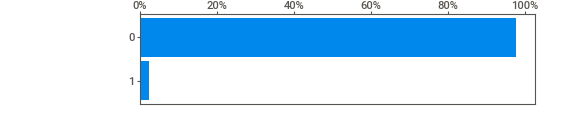
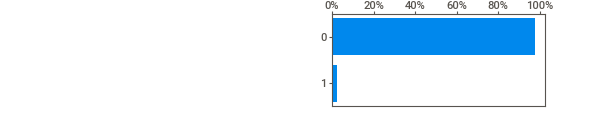
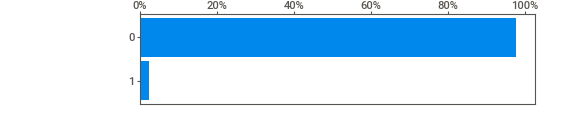
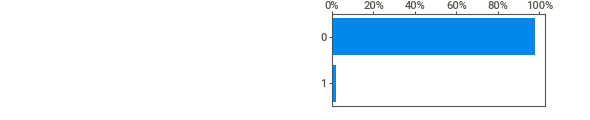
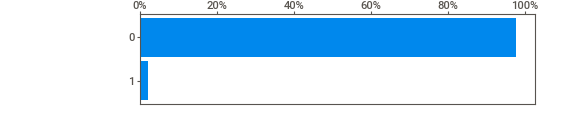
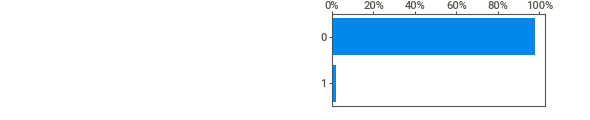
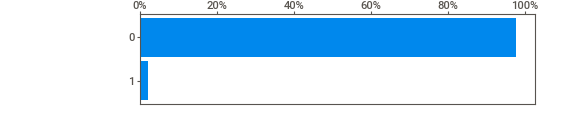
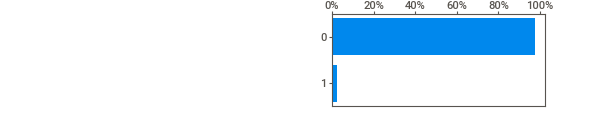
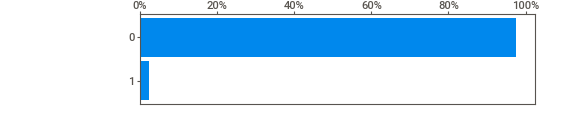
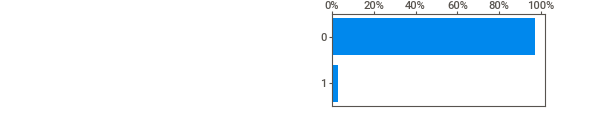
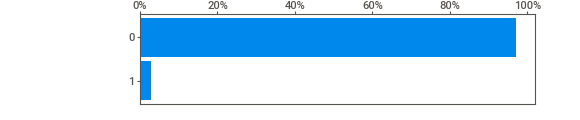
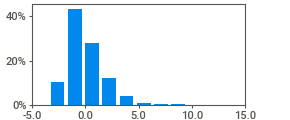
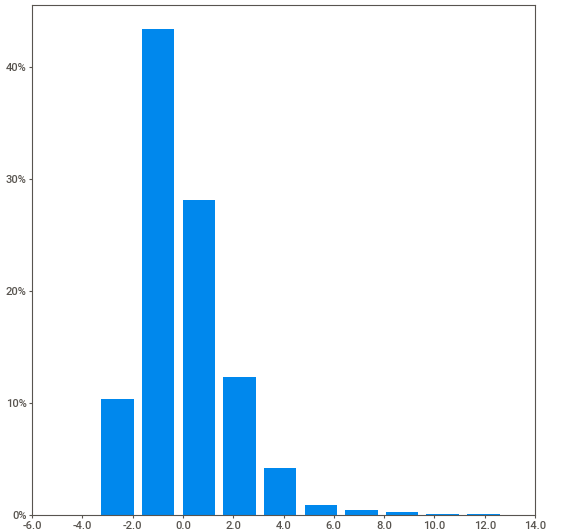
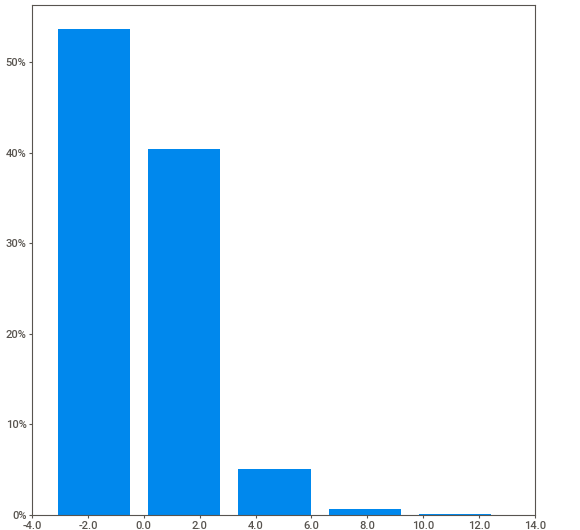
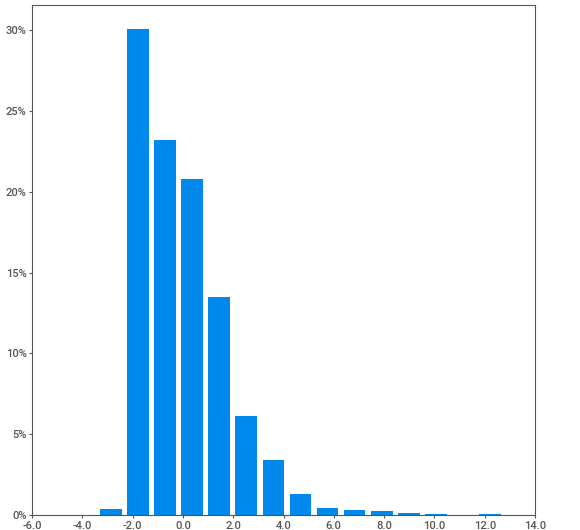
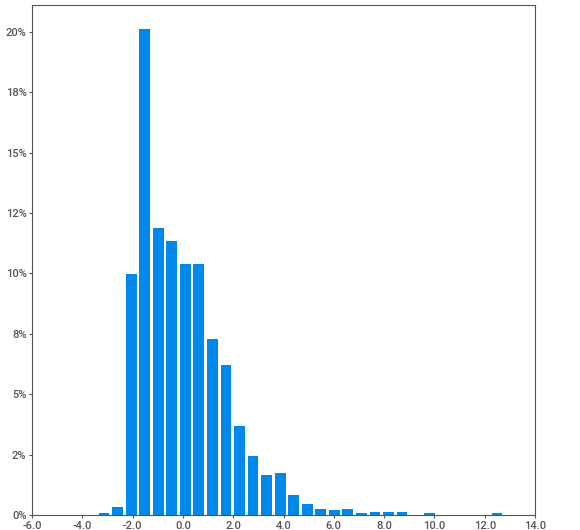
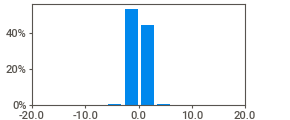
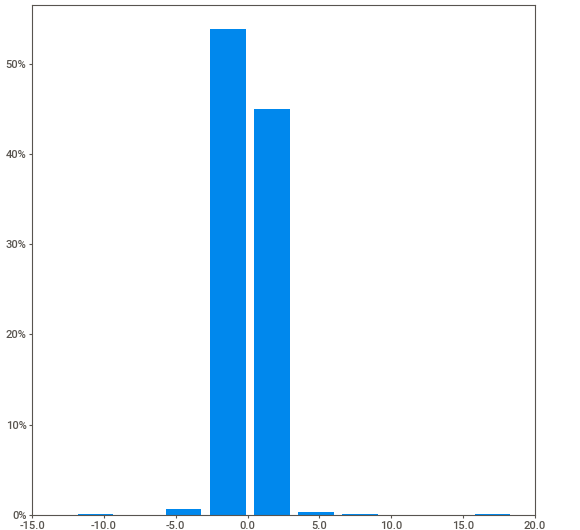
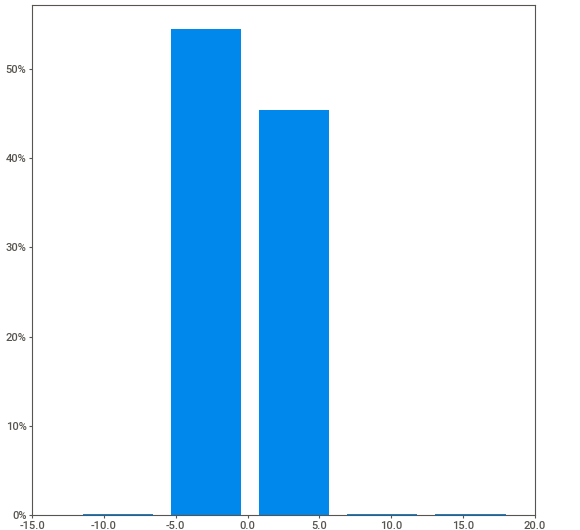
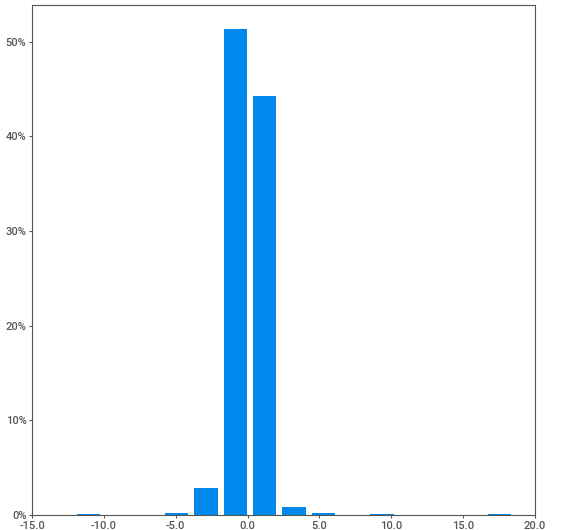
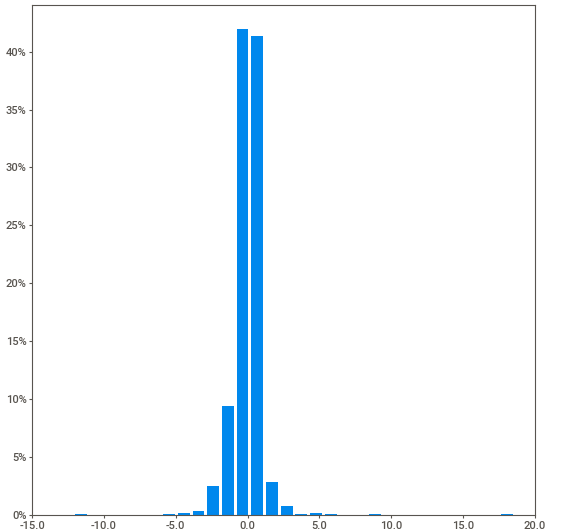
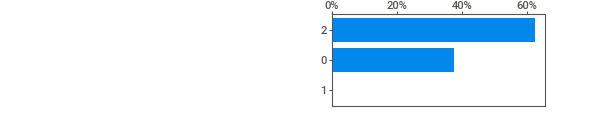
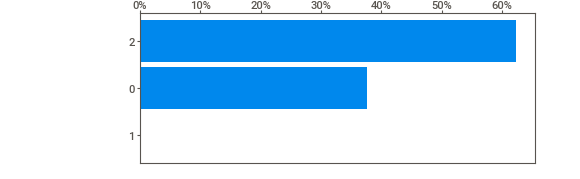
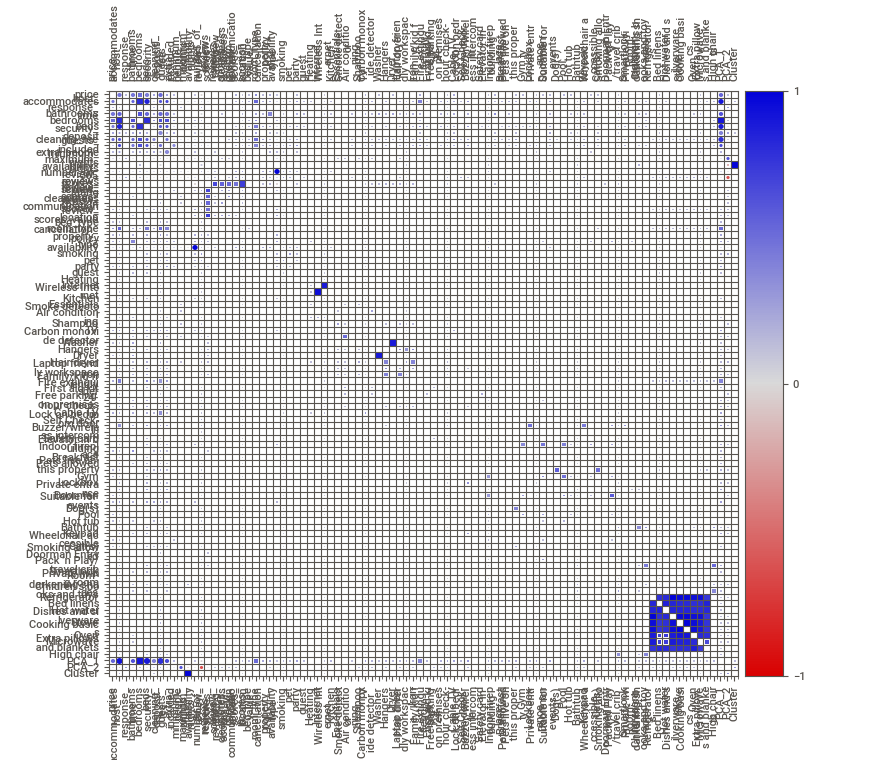
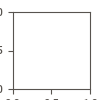

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

# Compare the performance of the models

In [ ]:
df = pd.read_csv('/content/listings_SanFan.csv')
# Get columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
np.random.seed(100)  # For reproducibility

# Create a new DataFrame with only columns containing missing values
df_missing_values = df[columns_with_missing_values]
df['price'] = df['price'].str.replace("\$|,", "").astype(float)

# Randomly select 5 categorical columns without missing values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_without_missing = [col for col in categorical_cols if col not in columns_with_missing_values]
selected_categorical_cols = np.random.choice(categorical_cols_without_missing, size=2, replace=False)

# Encode selected categorical columns
df_encoded = pd.get_dummies(df[selected_categorical_cols], columns=selected_categorical_cols)

# Combine original numeric columns and encoded categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_combined = pd.concat([df[numeric_cols], df_encoded], axis=1)
df2 = pd.concat([df_combined, df['price']], axis = 1)


In [ ]:
df2.shape

(5207, 99)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df2.drop(['price'], axis=1)

y = df2['price']


In [ ]:
X

id        scrape_id     host_id   host_acceptance_rate  \
0     13824783  20170510102046   55020055          NaN            
1     16740225  20170510102046   36722941          NaN            
2     18125245  20170510102046   51669215          NaN            
3      8362570  20170510102046   32837114          NaN            
4       789867  20170510102046    2782694          NaN            
...        ...             ...        ...                   ...   
5202   2484244  20170510102046   12709713          NaN            
5203   1412160  20170510102046    2789704          NaN            
5204  18393252  20170510102046  108311396          NaN            
5205  17481615  20170510102046    3068913          NaN            
5206  18548813  20170510102046   28464521          NaN            

      host_listings_count  host_total_listings_count  \
0              1                       1               
1              3                       3               
2              1                       1               
3              1                       1               
4              1                       1               
...                   ...                        ...   
5202           1                       1               
5203           1                       1               
5204           2                       2               
5205           1                       1               
5206           1                       1               

      neighbourhood_group_cleansed  latitude   longitude  accommodates  \
0                 NaN               41.976546 -87.684934        4        
1                 NaN               41.976522 -87.688755        2        
2                 NaN               41.972145 -87.699125        6        
3                 NaN               41.971007 -87.688129        2        
4                 NaN               41.964132 -87.675951        3        
...                            ...        ...        ...           ...   
5202              NaN               41.909067 -87.623046        2        
5203              NaN               42.022298 -87.685063        1        
5204              NaN               41.733547 -87.700903        3        
5205              NaN               41.962511 -87.637544        3        
5206              NaN               42.019789 -87.674228        4        

      bathrooms  bedrooms  beds  square_feet  guests_included  minimum_nights  \
0        1.0        1.0     2.0     NaN              2                2         
1        1.0        1.0     1.0     NaN              1                1         
2        1.5        2.0     3.0     NaN              4                1         
3        1.0        1.0     1.0     NaN              2                2         
4        1.0        1.0     1.0     NaN              1                3         
...         ...       ...   ...          ...              ...             ...   
5202     1.0        1.0     1.0     NaN              1                3         
5203     1.0        1.0     1.0     NaN              1                1         
5204     1.0        1.0     1.0     NaN              1                1         
5205     1.0        0.0     2.0     NaN              1                2         
5206     2.0        2.0     2.0     NaN              1                1         

      maximum_nights  has_availability  availability_30  availability_60  \
0          1125             NaN                1                8          
1             7             NaN                0                0          
2            90             NaN               11               38          
3             4             NaN                4               22          
4            20             NaN               13               23          
...              ...               ...              ...              ...   
5202       1125             NaN               16               33          
5203       1125             NaN               27             

In [ ]:
# Step: Compare Performance of Regressor Models before and after removing the missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred_orig = regressor.predict(X_test)
mse_orig = mean_squared_error(y_test, y_pred_orig)

X_transformed = df2.copy().dropna(subset=['bathrooms', 'bedrooms', 'beds',
'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value']).drop(['price'], axis=1)
y_trans = df2.copy().dropna(subset=['bathrooms', 'bedrooms', 'beds',
'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value'])['price']
print(X_transformed.shape, y_trans.shape)
X_train_trans, X_test_trans, y_train_trans, y_test_trans= train_test_split(X_transformed, y_trans, test_size=0.2, random_state=42)
regressor.fit(X_train_trans, y_train_trans)
y_pred_trans = regressor.predict(X_test_trans)
mse_trans = mean_squared_error(y_test_trans, y_pred_trans)

print("MSE before transformation (with missing values):", mse_orig)
print("MSE after transformation (without missing values):", mse_trans)

(4446, 97) (4446, 2)
MSE before transformation (with missing values): 8775.992654510566
MSE after transformation (without missing values): 3901.197247977521


# Go back and reload the data

In [ ]:
df = pd.read_csv('/content/listings_SanFan.csv')
# Get columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
np.random.seed(100)  # For reproducibility
# Create a new DataFrame with only columns containing missing values
df_missing_values = df[columns_with_missing_values]
df['price'] = df['price'].str.replace("\$|,", "").astype(float)

# Randomly select 5 categorical columns without missing values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_without_missing = [col for col in categorical_cols if col not in columns_with_missing_values]
selected_categorical_cols = np.random.choice(categorical_cols_without_missing, size=3, replace=False)

# Encode selected categorical columns
df_encoded = pd.get_dummies(df[selected_categorical_cols], columns=selected_categorical_cols)

# Combine original numeric columns and encoded categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_combined = pd.concat([df[numeric_cols], df_encoded], axis=1)
df2 = pd.concat([df_combined, df['price']], axis = 1).dropna(subset=['bathrooms', 'bedrooms', 'beds',
'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value'])
X = df2.drop(['price'], axis=1)
X = X[['id', 'scrape_id', 'host_id', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month']]
X.dropna()
y = df2['price'].iloc[:,0]


In [ ]:
X.columns

Index(['id', 'scrape_id', 'host_id', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regressor model
regressor = RandomForestRegressor()

# Fit the model on the original data
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_orig = regressor.predict(X_test)

# Calculate mean squared error (MSE) on the original data
mse_orig = mean_squared_error(y_test, y_pred_orig)

# Fit the model on the transformed data (with PCA, RFE, clustering)
X_transformed = X[['accommodates', 'bedrooms', 'beds', 'minimum_nights']]  # Use selected features from RFE removing cleaning fee
X_train_trans, X_test_trans, _, _ = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Fit the model on the transformed data
regressor.fit(X_train_trans, y_train)

# Make predictions on the transformed testing set
y_pred_trans = regressor.predict(X_test_trans)

# Calculate mean squared error (MSE) on the transformed data
mse_trans = mean_squared_error(y_test, y_pred_trans)

# Compare MSE before and after transformation
print("MSE before transformation:", mse_orig)
print("MSE after transformation:", mse_trans)


MSE before transformation: 4037.9125826966297
MSE after transformation: 7526.837582720655


## Reload data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the DataFrame
df = pd.read_csv('/content/listings_SanFan.csv')

# Get columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Convert price column to float
df['price'] = df['price'].str.replace("\$|,", "").astype(float)

# Randomly select 5 categorical columns without missing values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_without_missing = [col for col in categorical_cols if col not in columns_with_missing_values]

# Encode selected categorical columns using Label Encoder
label_encoder = LabelEncoder()
for col in categorical_cols_without_missing:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Combine original numeric columns and encoded categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_combined = pd.concat([df[numeric_cols], df[categorical_cols_without_missing]], axis=1)

# Filter out rows with missing values in specific columns
df2 = df_combined.dropna(subset=['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

# Define features (X) and target (y)
X = df2.drop(['price'], axis=1).select_dtypes(include=['number'])
X = X[['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed',
       'city', 'state', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type']]
y = df2.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed',
       'city', 'state', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type'], axis = 1)['price']


In [ ]:
print(X.shape, y.shape)

(4446, 51) (4446,)


In [ ]:
# Step 1: Perform PCA (Principal Component Analysis) with label encoded data
X_label_encoded = X
y_label_encoded = y

scaler = StandardScaler()
scaled_data_label_encoded = scaler.fit_transform(X_label_encoded)

pca = PCA(n_components=2)
pca_result_label_encoded = pca.fit_transform(scaled_data_label_encoded)

X['PCA_1_LabelEncoded'] = pca_result_label_encoded[:, 0]
X['PCA_2_LabelEncoded'] = pca_result_label_encoded[:, 1]

# Step 2: Perform Recursive Feature Elimination (RFE) with label encoded data
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_label_encoded, y_label_encoded)

selected_features_label_encoded = X_label_encoded.columns[rfe.support_]

# Step 3: Perform Clustering with label encoded data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_label_encoded)
X['Cluster_LabelEncoded'] = kmeans.labels_

# Step 4: Compare Performance of Regressor Models with label encoded data
X_train_label_encoded, X_test_label_encoded, y_train_label_encoded, y_test_label_encoded = train_test_split(X_label_encoded, y_label_encoded, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()
regressor.fit(X_train_label_encoded, y_train_label_encoded)
y_pred_orig_label_encoded = regressor.predict(X_test_label_encoded)
mse_orig_label_encoded = mean_squared_error(y_test_label_encoded, y_pred_orig_label_encoded)

X_transformed_label_encoded = X[selected_features_label_encoded]
print(X_transformed_label_encoded.shape, y_label_encoded.shape)
X_train_trans_label_encoded, X_test_trans_label_encoded, _, _ = train_test_split(X_transformed_label_encoded, y_label_encoded, test_size=0.2, random_state=42)

regressor.fit(X_train_trans_label_encoded, y_train_label_encoded)
y_pred_trans_label_encoded = regressor.predict(X_test_trans_label_encoded)
mse_trans_label_encoded = mean_squared_error(y_test_label_encoded, y_pred_trans_label_encoded)

print("MSE before transformation (with label encoding):", mse_orig_label_encoded)
print("MSE after transformation (with label encoding):", mse_trans_label_encoded)


(4446, 8) (4446,)
MSE before transformation (with label encoding): 10838.931763146069
MSE after transformation (with label encoding): 9455.242370297094


Binary encoding

In [ ]:
import pandas as pd
import category_encoders as ce

# Load the DataFrame
df = pd.read_csv('/content/listings_SanFan.csv')

# Get columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Convert price column to float
df['price'] = df['price'].str.replace("\$|,", "").astype(float)

# Randomly select 5 categorical columns without missing values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_without_missing = [col for col in categorical_cols if col not in columns_with_missing_values]

# Encode selected categorical columns using Binary Encoder
binary_encoder = ce.BinaryEncoder(cols=categorical_cols_without_missing)
df_encoded = binary_encoder.fit_transform(df[categorical_cols_without_missing])

# Combine original numeric columns and encoded categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_combined = pd.concat([df[numeric_cols], df_encoded], axis=1)

# Filter out rows with missing values in specific columns
df2 = df_combined.dropna(subset=['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

# Define features (X) and target (y)
X = df2.drop(['price'], axis=1).select_dtypes(include=['number'])[['id', 'scrape_id', 'host_id',
       'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates',]]
y = df2['price']


In [ ]:
X

id        scrape_id     host_id  host_listings_count  \
0     13824783  20170510102046  55020055           1            
2     18125245  20170510102046  51669215           1            
3      8362570  20170510102046  32837114           1            
4       789867  20170510102046   2782694           1            
5     16701336  20170510102046  36722941           3            
...        ...             ...       ...                  ...   
5197   2730613  20170510102046  13975150           2            
5198  10696416  20170510102046  55263315           1            
5199  16716143  20170510102046  30561059           1            
5200   3666299  20170510102046  18591377           2            
5202   2484244  20170510102046  12709713           1            

      host_total_listings_count  latitude   longitude  accommodates  
0                 1              41.976546 -87.684934        4       
2                 1              41.972145 -87.699125        6       
3                 1              41.971007 -87.688129        2       
4                 1              41.964132 -87.675951        3       
5                 3              41.976453 -87.689971        2       
...                         ...        ...        ...           ...  
5197              2              41.686124 -87.677352        4       
5198              1              41.996864 -87.808285        2       
5199              1              42.013268 -87.809949       10       
5200              2              41.997999 -87.811461        8       
5202              1              41.909067 -87.623046        2       

[4446 rows x 8 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import category_encoders as ce

# Assuming df_combined is the DataFrame obtained after combining numeric and binary encoded categorical columns

# Step 1: Perform PCA (Principal Component Analysis) with binary encoded data
X_binary_encoded = X
y_binary_encoded = y

scaler = StandardScaler()
scaled_data_binary_encoded = scaler.fit_transform(X_binary_encoded)

pca = PCA(n_components=2)
pca_result_binary_encoded = pca.fit_transform(scaled_data_binary_encoded)

X_binary_encoded['PCA_1_BinaryEncoded'] = pca_result_binary_encoded[:, 0]
X_binary_encoded['PCA_2_BinaryEncoded'] = pca_result_binary_encoded[:, 1]

# Step 2: Perform Recursive Feature Elimination (RFE) with binary encoded data
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_binary_encoded, y_binary_encoded)

selected_features_binary_encoded = X_binary_encoded.columns[rfe.support_]

# Step 3: Perform Clustering with binary encoded data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_binary_encoded)
X_binary_encoded['Cluster_BinaryEncoded'] = kmeans.labels_

# Step 4: Compare Performance of Regressor Models with binary encoded data
X_train_binary_encoded, X_test_binary_encoded, y_train_binary_encoded, y_test_binary_encoded = train_test_split(X_binary_encoded, y_binary_encoded, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()
regressor.fit(X_train_binary_encoded, y_train_binary_encoded)
y_pred_orig_binary_encoded = regressor.predict(X_test_binary_encoded)
mse_orig_binary_encoded = mean_squared_error(y_test_binary_encoded, y_pred_orig_binary_encoded)

X_transformed_binary_encoded = X_binary_encoded[selected_features_binary_encoded]
print(X_transformed_binary_encoded.shape, y_binary_encoded.shape)
X_train_trans_binary_encoded, X_test_trans_binary_encoded, _, _ = train_test_split(X_transformed_binary_encoded, y_binary_encoded, test_size=0.2, random_state=42)

regressor.fit(X_train_trans_binary_encoded, y_train_binary_encoded)
y_pred_trans_binary_encoded = regressor.predict(X_test_trans_binary_encoded)
mse_trans_binary_encoded = mean_squared_error(y_test_binary_encoded, y_pred_trans_binary_encoded)

print("MSE before transformation (with binary encoding):", mse_orig_binary_encoded)
print("MSE after transformation (with binary encoding):", mse_trans_binary_encoded)


(4446, 5) (4446,)
MSE before transformation (with binary encoding): 6956.6400946067415
MSE after transformation (with binary encoding): 6377.446591573035
